#Load Library

In [ ]:
import warnings
warnings.filterwarnings('ignore')  # Untuk mengabaikan pesan peringatan

import numpy as np  # Pustaka untuk operasi numerik pada array dan matriks berdimensi besar
import pandas as pd  # Pustaka untuk manipulasi dan analisis data, terutama berguna untuk data terstruktur (misalnya, file CSV)
import matplotlib.pyplot as plt  # Pustaka untuk membuat visualisasi statis, animasi, dan interaktif di Python
import seaborn as sns  # Pustaka visualisasi data yang berbasis matplotlib, menyediakan antarmuka tingkat tinggi untuk menggambar grafik statistik yang menarik

# Pustaka untuk pembelajaran mesin dan preprocessing
from sklearn.preprocessing import LabelEncoder  # Mengubah variabel kategorikal menjadi label numerik
from sklearn.preprocessing import StandardScaler  # Menstandarisasi fitur dengan menghilangkan mean dan skala ke variansi satuan
from sklearn.preprocessing import MinMaxScaler  # Menskalakan fitur ke dalam rentang, biasanya [0, 1]
from sklearn.decomposition import PCA  # Melakukan Principal Component Analysis (PCA) untuk reduksi dimensi

# Pustaka untuk clustering dan evaluasi
from sklearn.cluster import KMeans  # Algoritma clustering K-Means
from sklearn.metrics import davies_bouldin_score  # Mengevaluasi kualitas clustering menggunakan Davies-Bouldin Index
from sklearn.metrics import calinski_harabasz_score  # Mengevaluasi kualitas clustering menggunakan Calinski-Harabasz Index
from yellowbrick.cluster import KElbowVisualizer  # Visualizer untuk K-Means clustering untuk menentukan jumlah cluster yang optimal

# Toolkit untuk plotting 3D
from mpl_toolkits.mplot3d import Axes3D  # Digunakan untuk plotting 3D

#Load Dataset

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Gemastik 2024/Dataset/health_covid19.csv')

#Data Understanding

In [ ]:
df.head()

tahun  minggu  kode_provinsi nama_provinsi  \
0   2021      42             11          ACEH   
1   2021      42             11          ACEH   
2   2021      42             11          ACEH   
3   2021      42             11          ACEH   
4   2021      42             11          ACEH   

   angka_kejadian_rawat_inap_baru_covid_19_per_100000_populasi_per  \
0                                               0.24                 
1                                               0.24                 
2                                               0.24                 
3                                               0.24                 
4                                               0.24                 

   proporsi_tes_positif_covid_19_per_minggu  \
0                                       1.3   
1                                       1.3   
2                                       1.3   
3                                       1.3   
4                                       1.3   

   kasus_konfirmasi_baru_per_100000_penduduk_per_minggu  \
0                                               1.72      
1                                               1.72      
2                                               1.72      
3                                               1.72      
4                                               1.72      

   jumlah_kematian_akibat_covid_19_per_100000_penduduk_per_minggu  \
0                                               0.22                
1                                               0.22                
2                                               0.22                
3                                               0.22                
4                                               0.22                

   cakupan_vaksinasi_covid_19_dosis_lengkap_pada_lansia  \
0                                                7.8      
1                                                7.8      
2                                                7.8      
3                                                7.8      
4                                                7.8      

   proporsi_keterisian_tempat_tidur_rumah_sakit_per_minggu  \
0                                               9.68         
1                                               9.68         
2                                               9.68         
3                                               9.68         
4                                               9.68         

   rasio_kontak_erat_yang_teridentifikasi_untuk_setiap_kasus_konfi  \
0                                               9.21                 
1                                               9.21                 
2                                               9.21                 
3                                              12.11                 
4                                              12.11                 

   jumlah_orang_yang_dites_covid_19_per_1000_penduduk_per_minggu  
0                                               1.33              
1                                               0.11              
2                                               0.02              
3                                               1.33              
4                                               0.11

In [ ]:
df.shape

(6013436, 12)

Deskripsi Fitur:
- Tahun: menyatakan tahun produksi data dengan tipe data numerik.
- Minggu: menyatakan minggu produksi data yang dihitung berdasarkan minggu epidemiologi, yaitu dari Hari Minggu sampai dengan Hari Sabtu, dengan tipe data numerik.
- Kode Provinsi: menyatakan kode wilayah provinsi sesuai dengan Peraturan Menteri Dalam Negeri Nomor 58 Tahun 2021.
- Nama Provinsi: menyatakan nama provinsi sesuai dengan Peraturan Menteri Dalam Negeri Nomor 58 Tahun 2021.
- Kasus konfirmasi baru per 100.000 penduduk per minggu: menyatakan jumlah orang dengan hasil positif COVID-19 sesuai dengan kriteria kasus konfirmasi baru COVID-19 dalam waktu satu minggu dibagi dengan jumlah penduduk dikalikan dengan 100.000 penduduk proyeksi SUPAS 2015.
- Jumlah orang yang dites COVID-19 per 1000 penduduk per minggu: menyatakan jumlah orang yang mendapatkan pemeriksaan COVID-19 dalam waktu satu minggu dibagi dengan jumlah penduduk dikalikan dengan 1.000 penduduk proyeksi SUPAS 2015.
- Rasio kontak erat yang teridentifikasi untuk setiap kasus konfirmasi COVID-19 per minggu: menyatakan jumlah semua kontak erat yang teridentifikasi dibagi jumlah semua kasus konfirmasi dalam waktu satu minggu.
- Proporsi tes positif COVID-19 per minggu: menyatakan jumlah orang dengan hasil positif pemeriksaan COVID-19 dibagi dengan jumlah orang yang diperiksa dalam waktu satu minggu.
- Proporsi keterisian tempat tidur rumah sakit (bed occupation ratio) per minggu: menyatakan persentase keterpakaian tempat tidur rumah sakit pasien COVID-19 terhadap keseluruhan tempat tidur rumah sakit pasien COVID-19 tersedia dalam satu minggu.
- Angka kejadian rawat inap baru COVID-19 per 100.000 populasi per minggu: menyatakan jumlah pasien COVID-19 yang baru dirawat di rumah sakit dalam waktu satu minggu dibagi dengan jumlah penduduk dikalikan dengan 100.000 penduduk proyeksi SUPAS 2015.
- Jumlah kematian akibat COVID-19 per 100.000 penduduk per minggu: menyatakan jumlah orang meninggal akibat COVID-19 dalam waktu satu minggu dibagi dengan jumlah penduduk dikalikan dengan 100.000 penduduk proyeksi SUPAS 2015.

Tujuan dilaksanakannya SUPAS2015 diantaranya adalah untuk dapat memperkirakan jumlah, distribusi dan komposisi penduduk, untuk menyediakan data karakateristik kependudukan dan untuk penghitungan parameter demografi, sebagai koreksi terhadap hasil proyeksi penduduk 2010- 2035, dan sebagai bahan perencanaan serta evaluasi terakhir MDGs. Proyeksi penduduk Indonesia untuk tahun 2015-2045 berdasarkan hasil Survei Penduduk Antar Sensus (SUPAS) tahun 2015 menunjukkan bahwa penduduk Indonesia pada tahun 2045 diperkirakan akan berkisar antara 311 – 318,9 juta jiwa

#Data Preparation

##Data Preprocessing

In [ ]:
df_pre = df.copy()

In [ ]:
df_pre.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6013436 entries, 0 to 6013435
Data columns (total 12 columns):
 #   Column                                                           Dtype  
---  ------                                                           -----  
 0   tahun                                                            int64  
 1   minggu                                                           int64  
 2   kode_provinsi                                                    int64  
 3   nama_provinsi                                                    object 
 4   angka_kejadian_rawat_inap_baru_covid_19_per_100000_populasi_per  float64
 5   proporsi_tes_positif_covid_19_per_minggu                         float64
 6   kasus_konfirmasi_baru_per_100000_penduduk_per_minggu             float64
 7   jumlah_kematian_akibat_covid_19_per_100000_penduduk_per_minggu   float64
 8   cakupan_vaksinasi_covid_19_dosis_lengkap_pada_lansia             float64
 9   proporsi_keterisian_temp

In [ ]:
df_pre = df_pre.drop(columns=['cakupan_vaksinasi_covid_19_dosis_lengkap_pada_lansia','kode_provinsi'])

In [ ]:
df_pre.isna().sum()

tahun                                                              0
minggu                                                             0
nama_provinsi                                                      0
angka_kejadian_rawat_inap_baru_covid_19_per_100000_populasi_per    0
proporsi_tes_positif_covid_19_per_minggu                           0
kasus_konfirmasi_baru_per_100000_penduduk_per_minggu               0
jumlah_kematian_akibat_covid_19_per_100000_penduduk_per_minggu     0
proporsi_keterisian_tempat_tidur_rumah_sakit_per_minggu            0
rasio_kontak_erat_yang_teridentifikasi_untuk_setiap_kasus_konfi    0
jumlah_orang_yang_dites_covid_19_per_1000_penduduk_per_minggu      0
dtype: int64

In [ ]:
df_pre.duplicated().sum()

3983233

In [ ]:
df_pre = df_pre.drop_duplicates().reset_index(drop=True)

In [ ]:
df_pre.shape

(2030203, 10)

In [ ]:
nama_kolom_baru = {
    'angka_kejadian_rawat_inap_baru_covid_19_per_100000_populasi_per': 'Rawat Inap Baru per 100k',
    'proporsi_tes_positif_covid_19_per_minggu': 'Proporsi Tes Positif',
    'kasus_konfirmasi_baru_per_100000_penduduk_per_minggu': 'Kasus Baru per 100k Penduduk',
    'jumlah_kematian_akibat_covid_19_per_100000_penduduk_per_minggu': 'Kematian per 100k Penduduk',
    'proporsi_keterisian_tempat_tidur_rumah_sakit_per_minggu': 'Rasio Keterisian Tempat Tidur',
    'rasio_kontak_erat_yang_teridentifikasi_untuk_setiap_kasus_konfi': 'Rasio Kontak Erat per Kasus',
    'jumlah_orang_yang_dites_covid_19_per_1000_penduduk_per_minggu': 'Orang Dites per 1k Penduduk'
}

# Mengubah nama beberapa kolom sekaligus
df_pre.rename(columns=nama_kolom_baru, inplace=True)

In [ ]:
df_pre.columns

Index(['tahun', 'minggu', 'nama_provinsi', 'Rawat Inap Baru per 100k',
       'Proporsi Tes Positif', 'Kasus Baru per 100k Penduduk',
       'Kematian per 100k Penduduk', 'Rasio Keterisian Tempat Tidur',
       'Rasio Kontak Erat per Kasus', 'Orang Dites per 1k Penduduk'],
      dtype='object')

In [ ]:
col = list(df_pre.columns)
col.remove('nama_provinsi')
categorical_features = ['nama_provinsi']
numerical_features = [*col]
print('Categorical Features :',*categorical_features)
print('Numerical Features :',*numerical_features)

Categorical Features : nama_provinsi
Numerical Features : tahun minggu Rawat Inap Baru per 100k Proporsi Tes Positif Kasus Baru per 100k Penduduk Kematian per 100k Penduduk Rasio Keterisian Tempat Tidur Rasio Kontak Erat per Kasus Orang Dites per 1k Penduduk


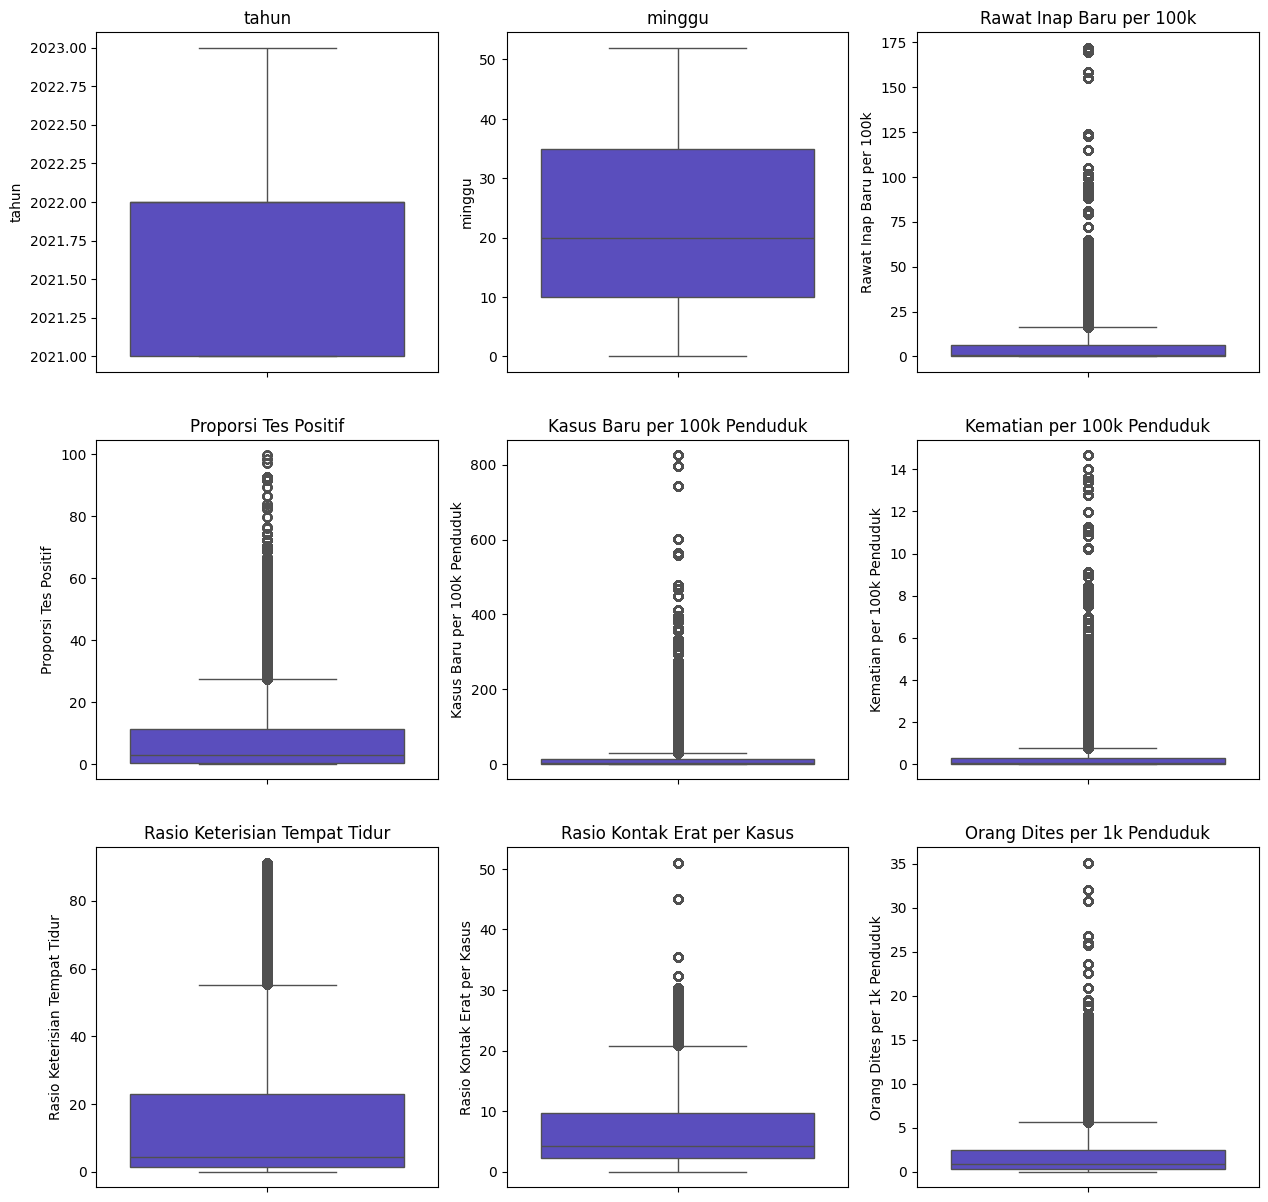

In [ ]:
colors = ['#4C3BCF','#2D2926']
fig  = plt.subplots(nrows = 3,ncols = 3,figsize = (15,15))
for i in range(len(numerical_features)):
    plt.subplot(3,3,i+1)
    ax = sns.boxplot(df_pre[numerical_features[i]],color = colors[0])
    plt.title(numerical_features[i])
plt.show()

Outlier akan diatasi dengan Normalisasi data

##EDA

In [ ]:
df_eda = df_pre.copy()

In [ ]:
df_eda.describe()

tahun        minggu  Rawat Inap Baru per 100k  \
count  2.030203e+06  2.030203e+06              2.030203e+06   
mean   2.021834e+03  2.252141e+01              5.551611e+00   
std    7.718349e-01  1.448634e+01              1.199084e+01   
min    2.021000e+03  0.000000e+00              0.000000e+00   
25%    2.021000e+03  1.000000e+01              1.800000e-01   
50%    2.022000e+03  2.000000e+01              9.400000e-01   
75%    2.022000e+03  3.500000e+01              6.620000e+00   
max    2.023000e+03  5.200000e+01              1.720500e+02   

       Proporsi Tes Positif  Kasus Baru per 100k Penduduk  \
count          2.030203e+06                  2.030203e+06   
mean           7.952044e+00                  1.748703e+01   
std            1.132050e+01                  5.010729e+01   
min            0.000000e+00                  0.000000e+00   
25%            4.600000e-01                  2.700000e-01   
50%            2.930000e+00                  1.930000e+00   
75%            1.123000e+01                  1.222000e+01   
max            9.971000e+01                  8.254600e+02   

       Kematian per 100k Penduduk  Rasio Keterisian Tempat Tidur  \
count                2.030203e+06                   2.030203e+06   
mean                 3.775557e-01                   1.477025e+01   
std                  1.065429e+00                   2.000569e+01   
min                  0.000000e+00                   0.000000e+00   
25%                  0.000000e+00                   1.530000e+00   
50%                  5.000000e-02                   4.250000e+00   
75%                  3.000000e-01                   2.304000e+01   
max                  1.467000e+01                   9.119000e+01   

       Rasio Kontak Erat per Kasus  Orang Dites per 1k Penduduk  
count                 2.030203e+06                 2.030203e+06  
mean                  6.259153e+00                 1.981472e+00  
std                   5.812331e+00                 3.088127e+00  
min                   0.000000e+00                 0.000000e+00  
25%                   2.220000e+00                 2.500000e-01  
50%                   4.300000e+00                 8.300000e-01  
75%                   9.670000e+00                 2.420000e+00  
max                   5.100000e+01                 3.509000e+01

In [ ]:
df_eda['minggu'].sort_values(ascending=False).unique()

array([52, 51, 50, 49, 48, 47, 46, 45, 44, 43, 42, 41, 40, 39, 38, 37, 36,
       35, 34, 33, 32, 31, 30, 29, 28, 27, 26, 25, 24, 23, 22, 21, 20, 19,
       18, 17, 16, 15, 14, 13, 12, 11, 10,  9,  8,  7,  6,  5,  4,  3,  2,
        1,  0])

In [ ]:
df_eda['minggu'].value_counts().head()

minggu
17    56214
10    55404
13    55404
11    54756
15    54594
Name: count, dtype: int64

Dapat dilakukan feature engginering dari minggu ke bulan

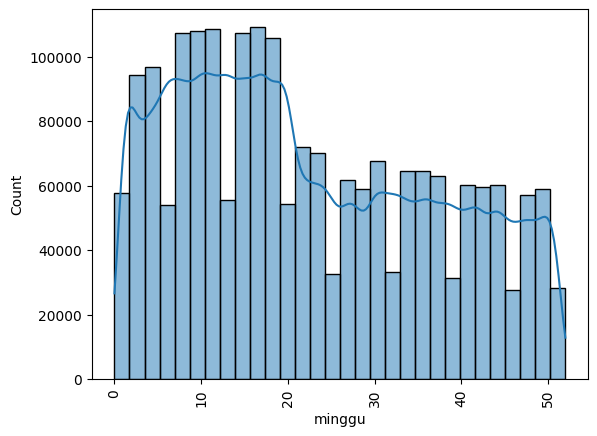

In [ ]:
sns.histplot(data=df_eda, x='minggu', bins=30, kde=True)
plt.xticks(rotation=90)
plt.show()

In [ ]:
df_eda['nama_provinsi'].sort_values(ascending=True).unique()

array(['ACEH', 'BALI', 'BANTEN', 'BENGKULU', 'DI YOGYAKARTA',
       'DKI JAKARTA', 'GORONTALO', 'INDONESIA', 'JAMBI', 'JAWA BARAT',
       'JAWA TENGAH', 'JAWA TIMUR', 'KALIMANTAN BARAT',
       'KALIMANTAN SELATAN', 'KALIMANTAN TENGAH', 'KALIMANTAN TIMUR',
       'KALIMANTAN UTARA', 'KEPULAUAN BANGKA BELITUNG', 'KEPULAUAN RIAU',
       'LAMPUNG', 'MALUKU', 'MALUKU UTARA', 'NUSA TENGGARA BARAT',
       'NUSA TENGGARA TIMUR', 'PAPUA', 'PAPUA BARAT', 'RIAU',
       'SULAWESI BARAT', 'SULAWESI SELATAN', 'SULAWESI TENGAH',
       'SULAWESI TENGGARA', 'SULAWESI UTARA', 'SUMATERA BARAT',
       'SUMATERA SELATAN', 'SUMATERA UTARA'], dtype=object)

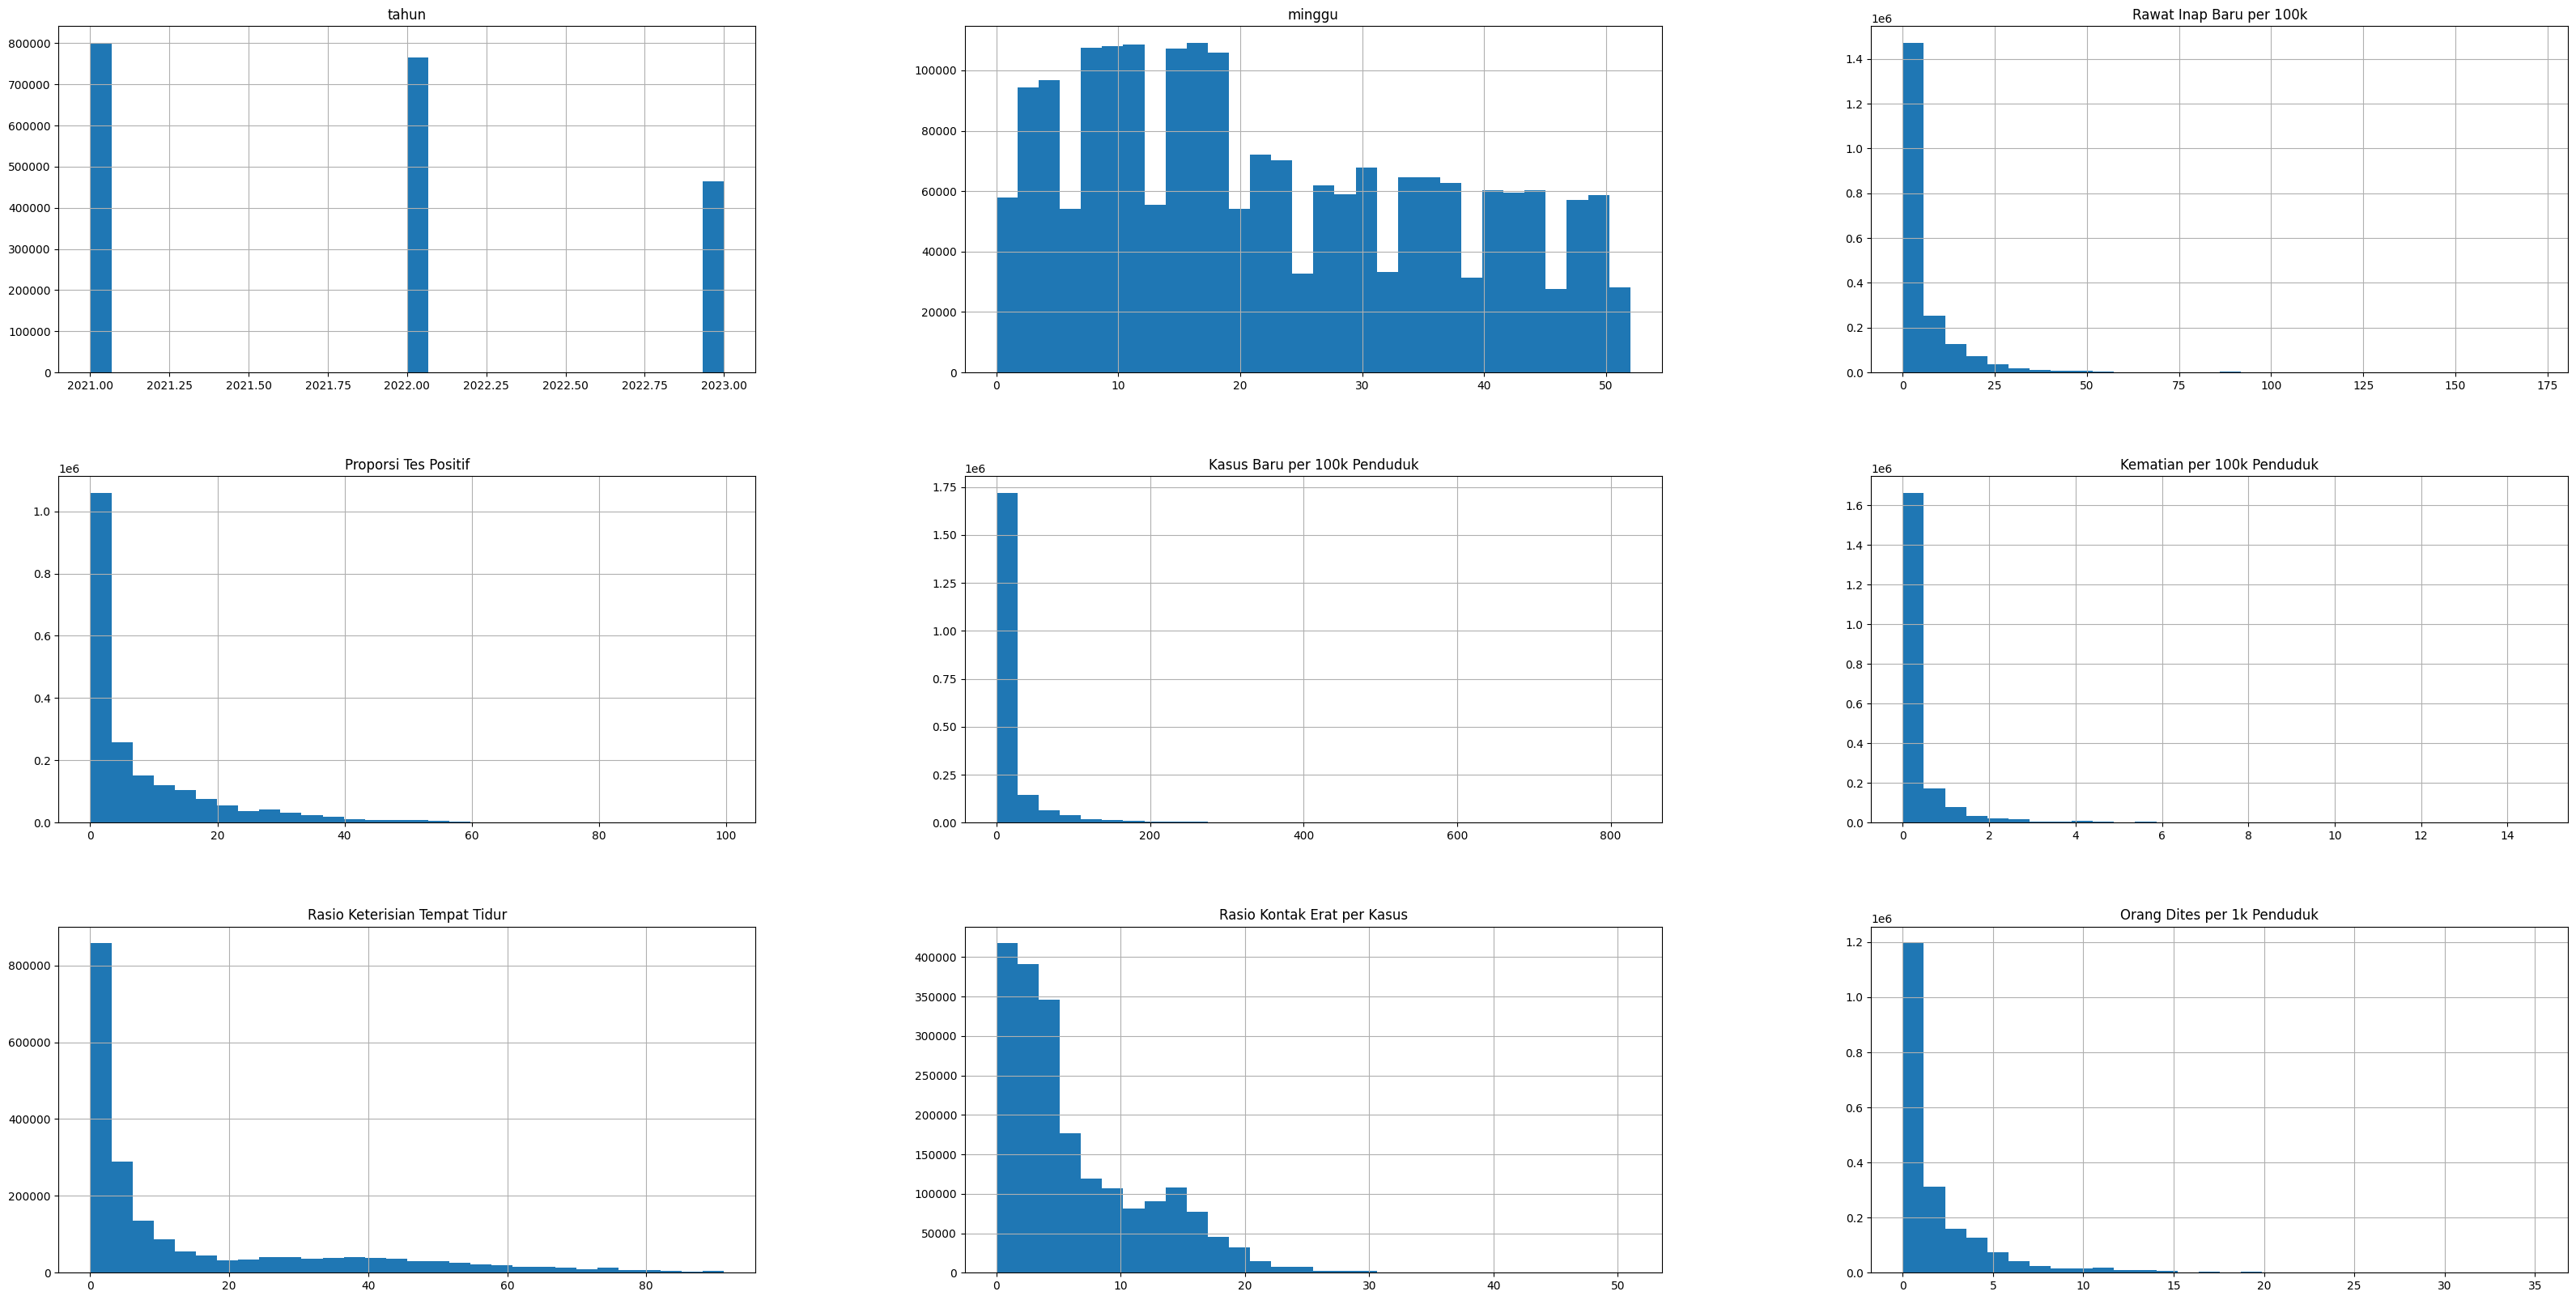

In [ ]:
df_eda.hist(bins=30, figsize=(40, 20))
plt.show()

Distribusi dari beberapa feature adalah distribusi skew

##Feature Engineering

In [ ]:
df_fe = df_eda.copy()

In [ ]:
df_fe.head()

tahun  minggu nama_provinsi  Rawat Inap Baru per 100k  \
0   2021      42          ACEH                      0.24   
1   2021      42          ACEH                      0.24   
2   2021      42          ACEH                      0.24   
3   2021      42          ACEH                      0.24   
4   2021      42          ACEH                      0.24   

   Proporsi Tes Positif  Kasus Baru per 100k Penduduk  \
0                   1.3                          1.72   
1                   1.3                          1.72   
2                   1.3                          1.72   
3                   1.3                          1.72   
4                   1.3                          1.72   

   Kematian per 100k Penduduk  Rasio Keterisian Tempat Tidur  \
0                        0.22                           9.68   
1                        0.22                           9.68   
2                        0.22                           9.68   
3                        0.22                           9.68   
4                        0.22                           9.68   

   Rasio Kontak Erat per Kasus  Orang Dites per 1k Penduduk  
0                         9.21                         1.33  
1                         9.21                         0.11  
2                         9.21                         0.02  
3                        12.11                         1.33  
4                        12.11                         0.11

In [ ]:
df_fe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2030203 entries, 0 to 2030202
Data columns (total 10 columns):
 #   Column                         Dtype  
---  ------                         -----  
 0   tahun                          int64  
 1   minggu                         int64  
 2   nama_provinsi                  object 
 3   Rawat Inap Baru per 100k       float64
 4   Proporsi Tes Positif           float64
 5   Kasus Baru per 100k Penduduk   float64
 6   Kematian per 100k Penduduk     float64
 7   Rasio Keterisian Tempat Tidur  float64
 8   Rasio Kontak Erat per Kasus    float64
 9   Orang Dites per 1k Penduduk    float64
dtypes: float64(7), int64(2), object(1)
memory usage: 154.9+ MB


In [ ]:
# Fungsi untuk mengubah minggu menjadi bulan
def minggu_ke_bulan(minggu):
    if minggu == 0:
        return 1
    elif minggu >= 1 and minggu <= 4:
        return 1
    elif minggu >= 5 and minggu <= 8:
        return 2
    elif minggu >= 9 and minggu <= 13:
        return 3
    elif minggu >= 14 and minggu <= 17:
        return 4
    elif minggu >= 18 and minggu <= 21:
        return 5
    elif minggu >= 22 and minggu <= 26:
        return 6
    elif minggu >= 27 and minggu <= 30:
        return 7
    elif minggu >= 31 and minggu <= 35:
        return 8
    elif minggu >= 36 and minggu <= 39:
        return 9
    elif minggu >= 40 and minggu <= 43:
        return 10
    elif minggu >= 44 and minggu <= 48:
        return 11
    elif minggu >= 49 and minggu <= 52:
        return 12

# Menambahkan kolom 'bulan' ke dataframe
df_fe['bulan'] = df_fe['minggu'].apply(minggu_ke_bulan)

In [ ]:
# Fungsi untuk menghitung status
def hitung_status(row):
    a = row['Kasus Baru per 100k Penduduk'] - row['Kematian per 100k Penduduk']
    if a <= 0:
        return "Status Terkendali"
    else:
        return "Status Tidak Terkendali"

# Menerapkan fungsi ke setiap baris dalam DataFrame
df_fe['Status'] = df_fe.apply(hitung_status, axis=1)

In [ ]:
df_fe['Status'].value_counts()

Status
Status Tidak Terkendali    1670225
Status Terkendali           359978
Name: count, dtype: int64

In [ ]:
# Stay or No
def inap_or_no(row):
    a = row['Kasus Baru per 100k Penduduk'] - row['Rawat Inap Baru per 100k']
    if a <= 0:
        return "Rata-rata Rawat Inap"
    else:
        return "Rata-rata Tidak Rawat Inap"

# Menerapkan fungsi ke setiap baris dalam DataFrame
df_fe['Inap atau Tidak'] = df_fe.apply(inap_or_no, axis=1)

In [ ]:
df_fe['Inap atau Tidak'].value_counts()

Inap atau Tidak
Rata-rata Tidak Rawat Inap    1289755
Rata-rata Rawat Inap           740448
Name: count, dtype: int64

In [ ]:
df_fe.head()

tahun  minggu nama_provinsi  Rawat Inap Baru per 100k  \
0   2021      42          ACEH                      0.24   
1   2021      42          ACEH                      0.24   
2   2021      42          ACEH                      0.24   
3   2021      42          ACEH                      0.24   
4   2021      42          ACEH                      0.24   

   Proporsi Tes Positif  Kasus Baru per 100k Penduduk  \
0                   1.3                          1.72   
1                   1.3                          1.72   
2                   1.3                          1.72   
3                   1.3                          1.72   
4                   1.3                          1.72   

   Kematian per 100k Penduduk  Rasio Keterisian Tempat Tidur  \
0                        0.22                           9.68   
1                        0.22                           9.68   
2                        0.22                           9.68   
3                        0.22                           9.68   
4                        0.22                           9.68   

   Rasio Kontak Erat per Kasus  Orang Dites per 1k Penduduk  bulan  \
0                         9.21                         1.33     10   
1                         9.21                         0.11     10   
2                         9.21                         0.02     10   
3                        12.11                         1.33     10   
4                        12.11                         0.11     10   

                    Status             Inap atau Tidak  
0  Status Tidak Terkendali  Rata-rata Tidak Rawat Inap  
1  Status Tidak Terkendali  Rata-rata Tidak Rawat Inap  
2  Status Tidak Terkendali  Rata-rata Tidak Rawat Inap  
3  Status Tidak Terkendali  Rata-rata Tidak Rawat Inap  
4  Status Tidak Terkendali  Rata-rata Tidak Rawat Inap

In [ ]:
# Encode categorical columns with LabelEncoder
label_encoder_cols = ['Status', 'Inap atau Tidak']
for col in label_encoder_cols:
    le = LabelEncoder()
    df_fe[col] = le.fit_transform(df_fe[col])

df_fe.head(1)

tahun  minggu nama_provinsi  Rawat Inap Baru per 100k  \
0   2021      42          ACEH                      0.24   

   Proporsi Tes Positif  Kasus Baru per 100k Penduduk  \
0                   1.3                          1.72   

   Kematian per 100k Penduduk  Rasio Keterisian Tempat Tidur  \
0                        0.22                           9.68   

   Rasio Kontak Erat per Kasus  Orang Dites per 1k Penduduk  bulan  Status  \
0                         9.21                         1.33     10       1   

   Inap atau Tidak  
0                1

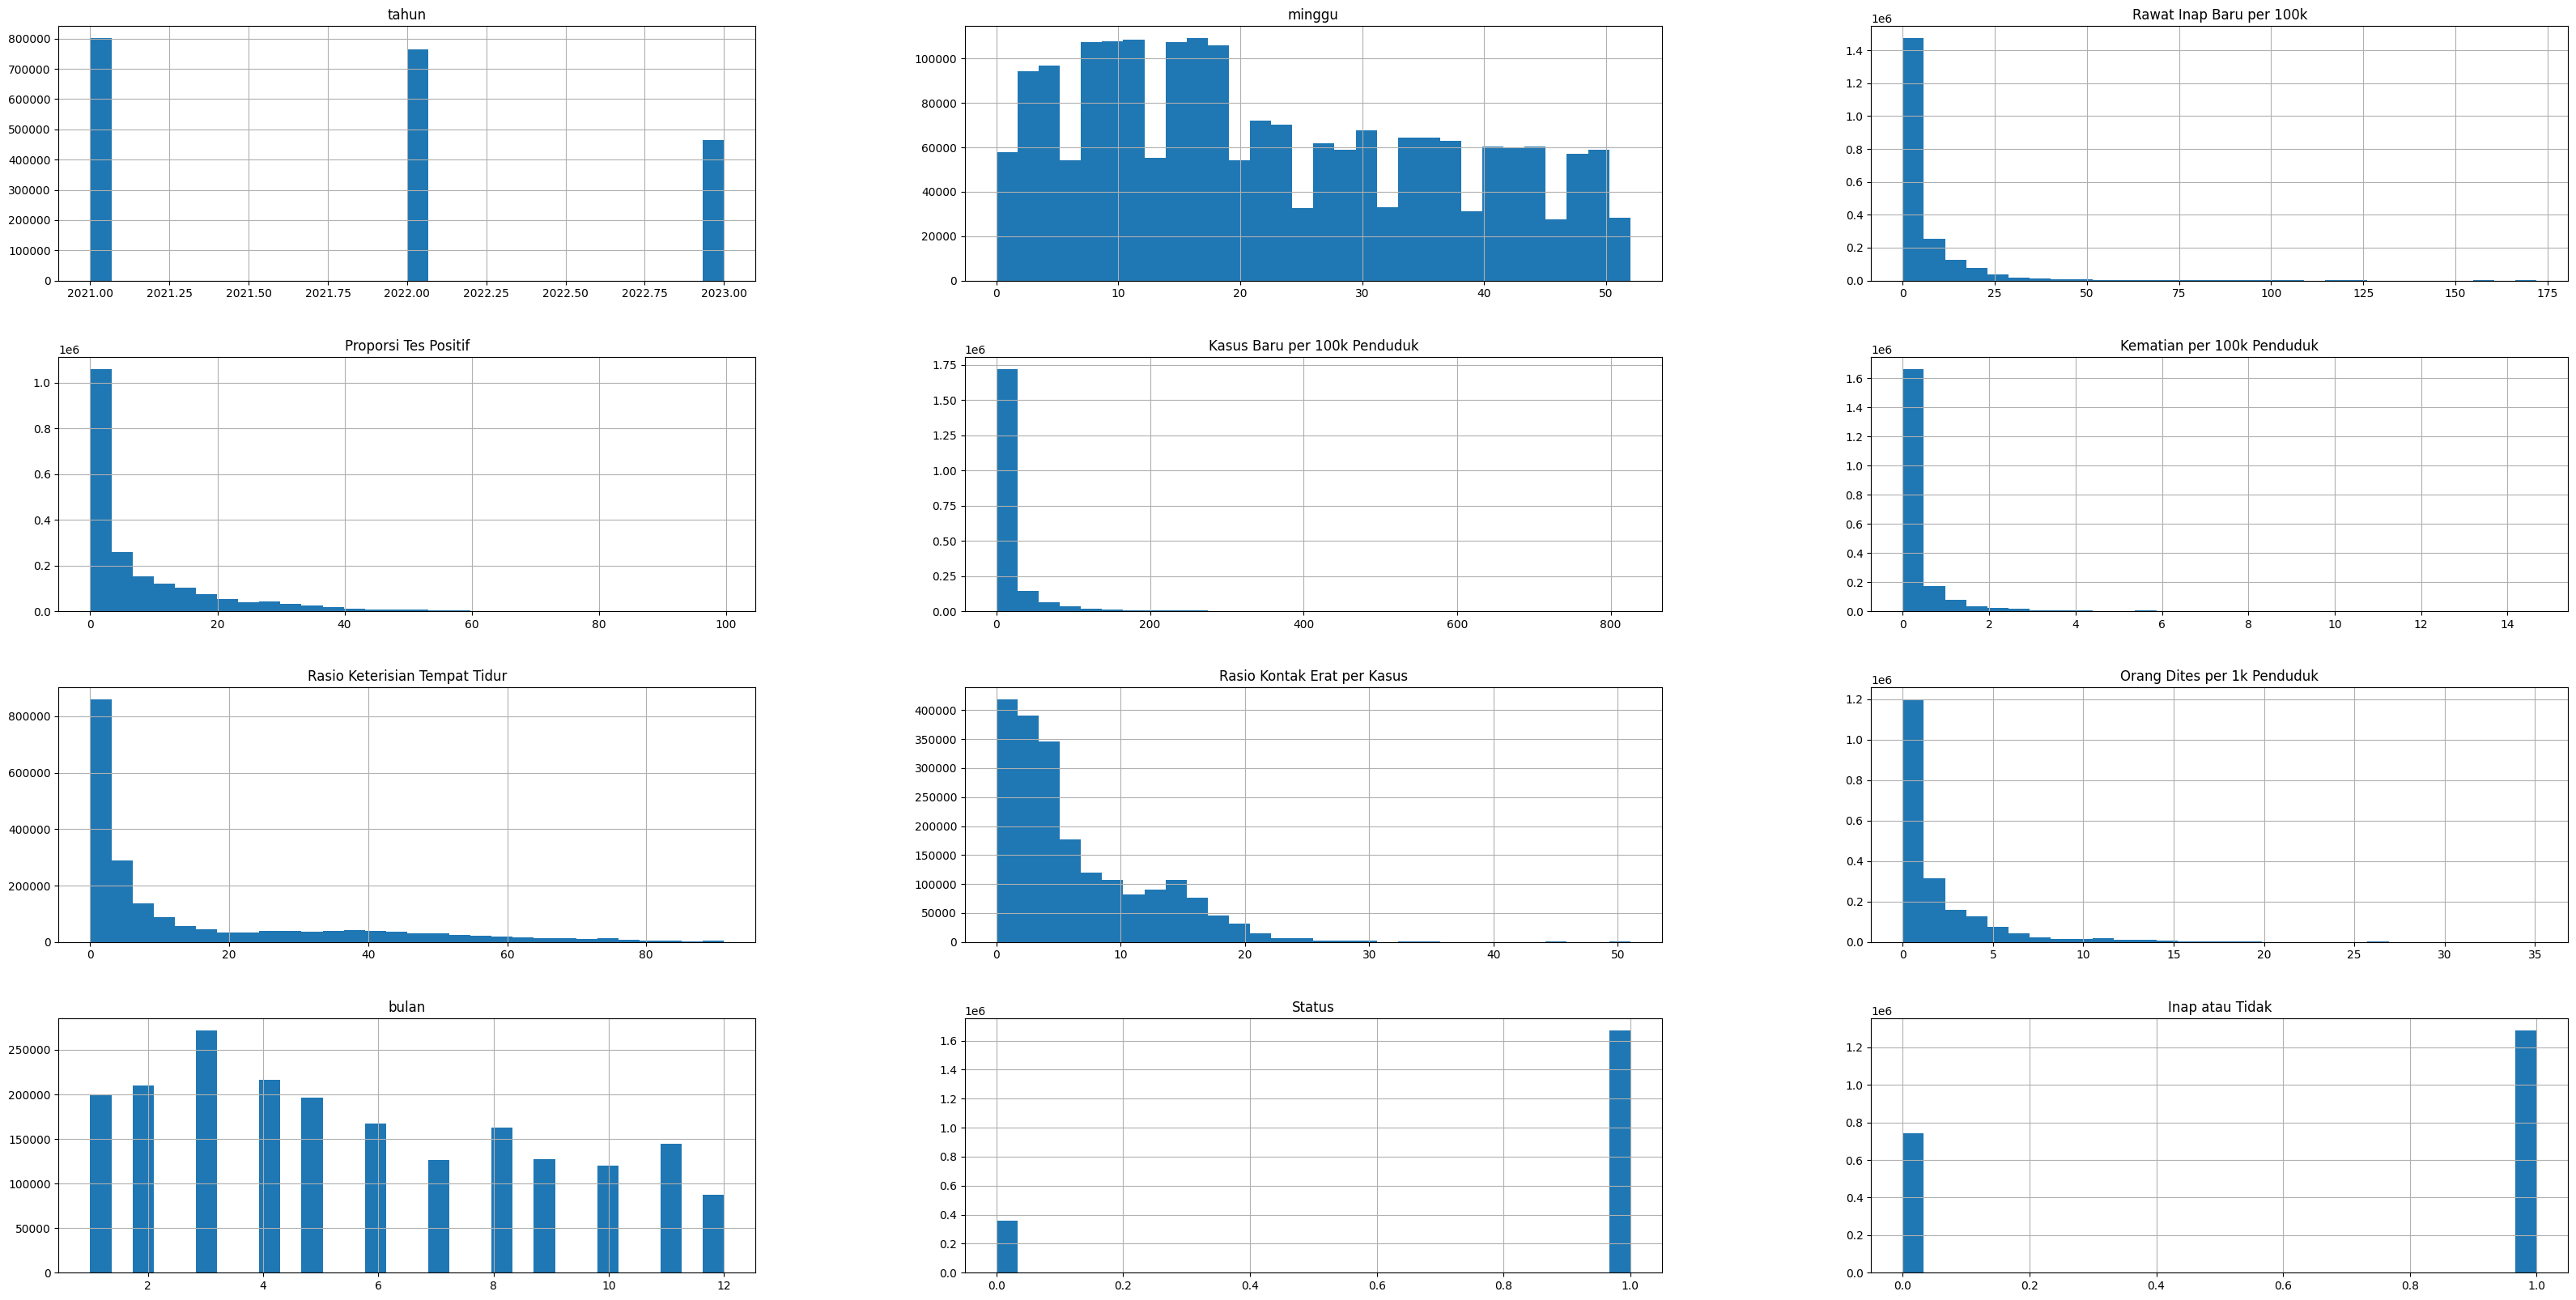

In [ ]:
df_fe.hist(bins=30, figsize=(40, 20))
plt.show()

In [ ]:
# Mengatur fitur kategorikal dan numerikal
col = list(df_fe.columns)
col.remove('nama_provinsi')
categorical_features = ['nama_provinsi']
numerical_features = [*col]
print('Categorical Features :', *categorical_features)
print('Numerical Features :', *numerical_features)

Categorical Features : nama_provinsi
Numerical Features : tahun minggu Rawat Inap Baru per 100k Proporsi Tes Positif Kasus Baru per 100k Penduduk Kematian per 100k Penduduk Rasio Keterisian Tempat Tidur Rasio Kontak Erat per Kasus Orang Dites per 1k Penduduk bulan Status Inap atau Tidak


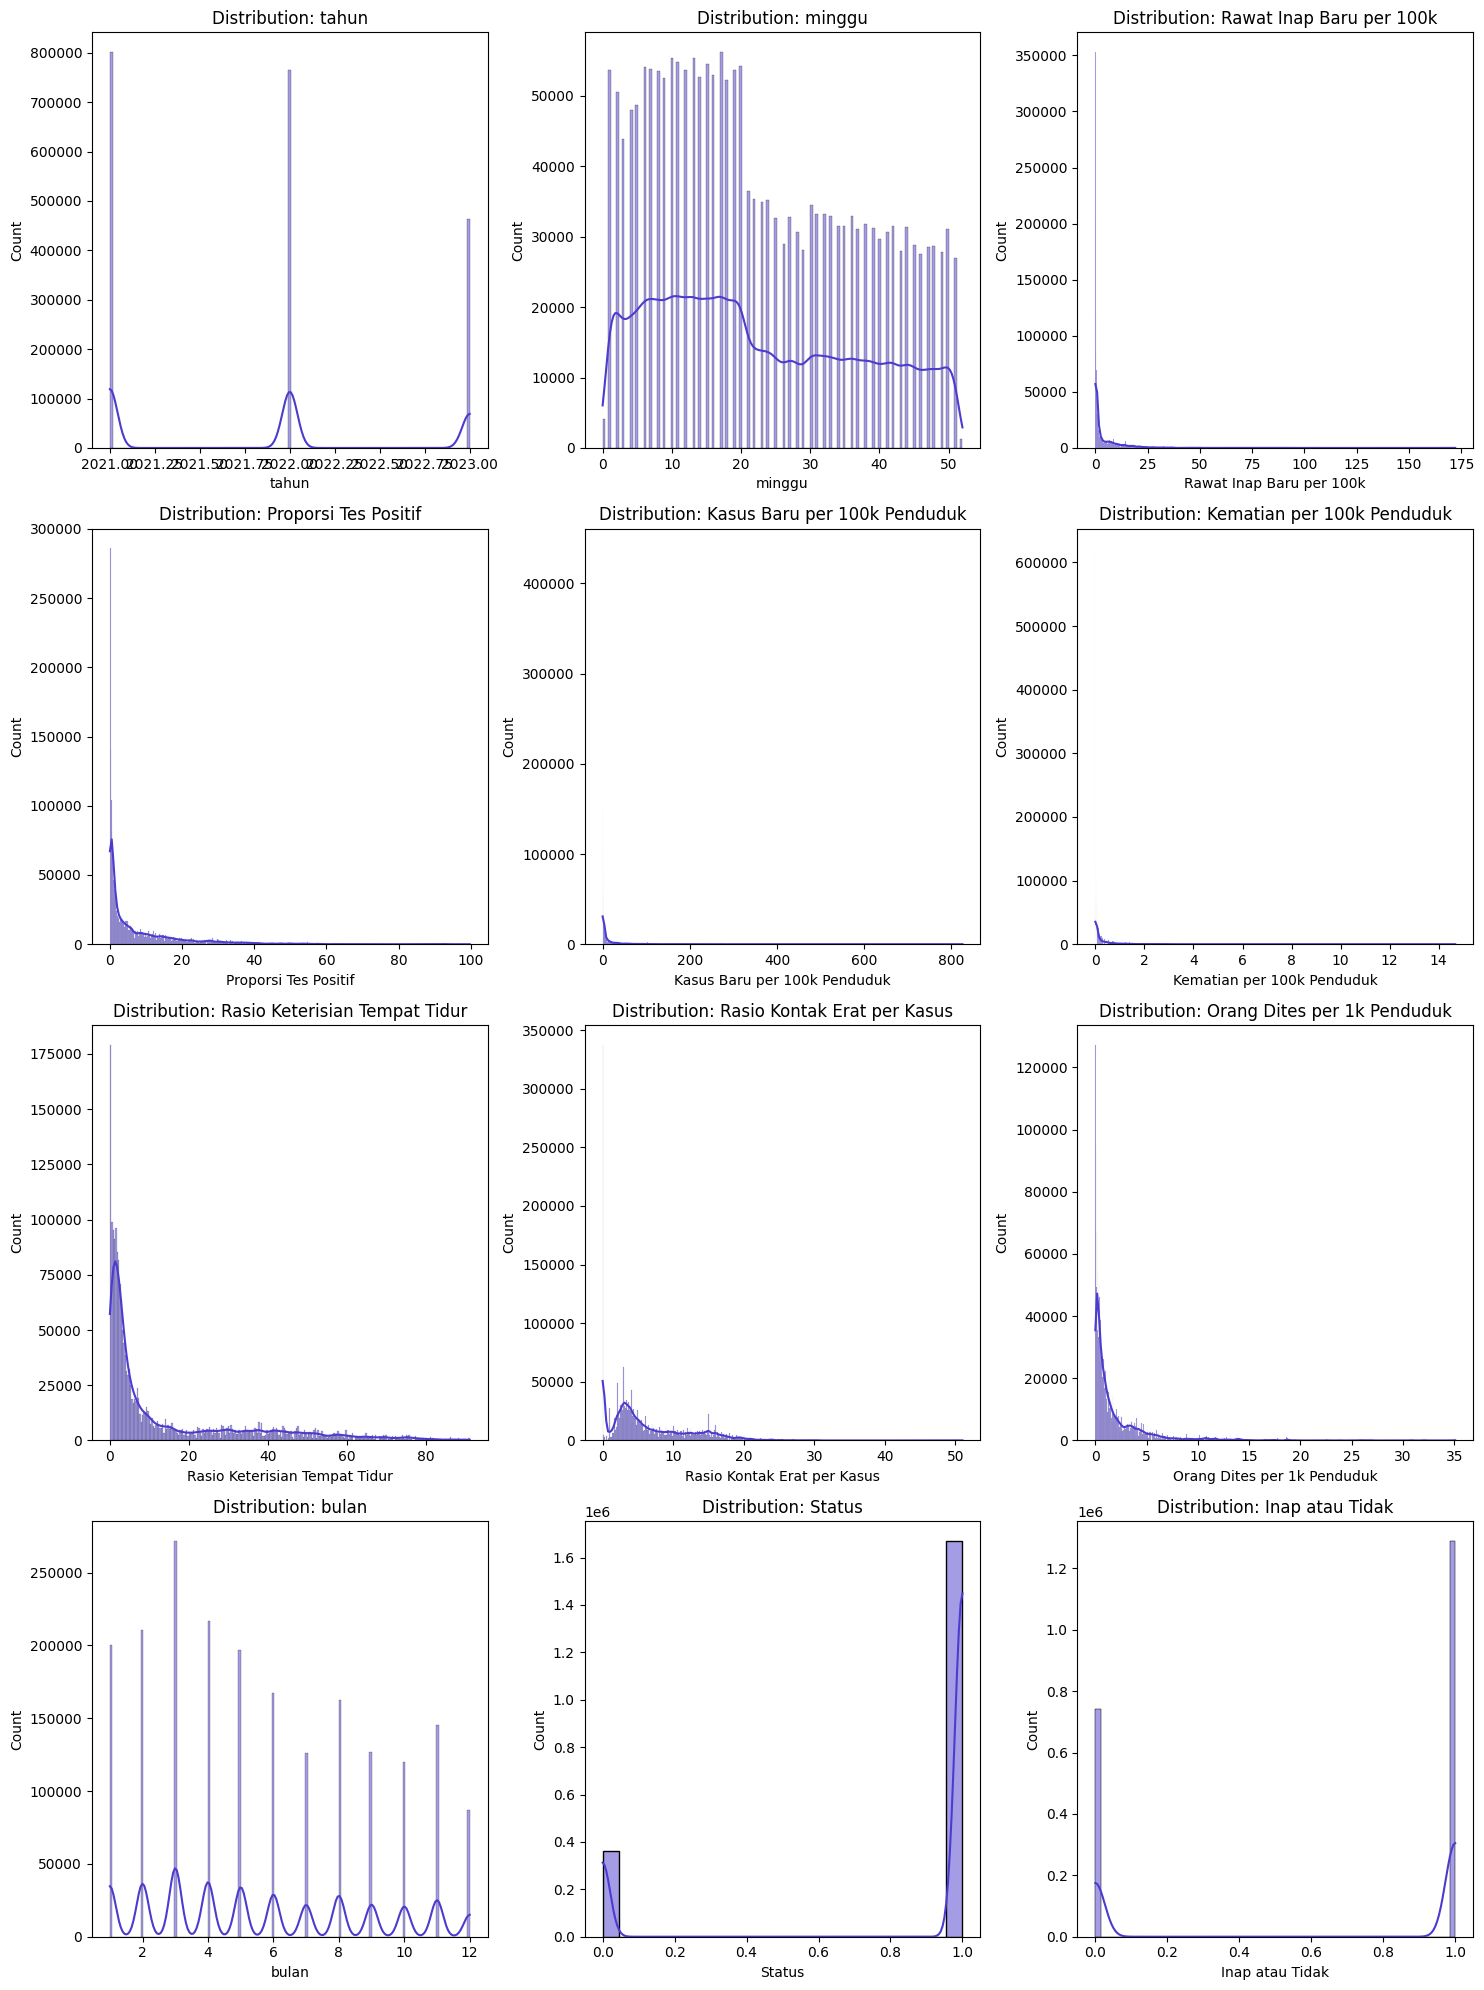

In [ ]:
# Warna untuk plot
colors = ['#4C3BCF', '#2D2926']

# Membuat subplot dengan jumlah yang cukup untuk menampung semua fitur
num_plots = len(numerical_features)
rows = (num_plots // 3) + (1 if num_plots % 3 != 0 else 0)
cols = 3

fig, ax = plt.subplots(nrows=rows, ncols=cols, figsize=(15, 5 * rows))

# Flatten the axes array for easy iteration
ax = ax.flatten()

for i, feature in enumerate(numerical_features):
    sns.histplot(df_fe[feature], color=colors[0], ax=ax[i], kde=True)
    title = 'Distribution: ' + feature
    ax[i].set_title(title)

# Remove any unused subplots
for j in range(i + 1, len(ax)):
    fig.delaxes(ax[j])

plt.tight_layout()
plt.show()

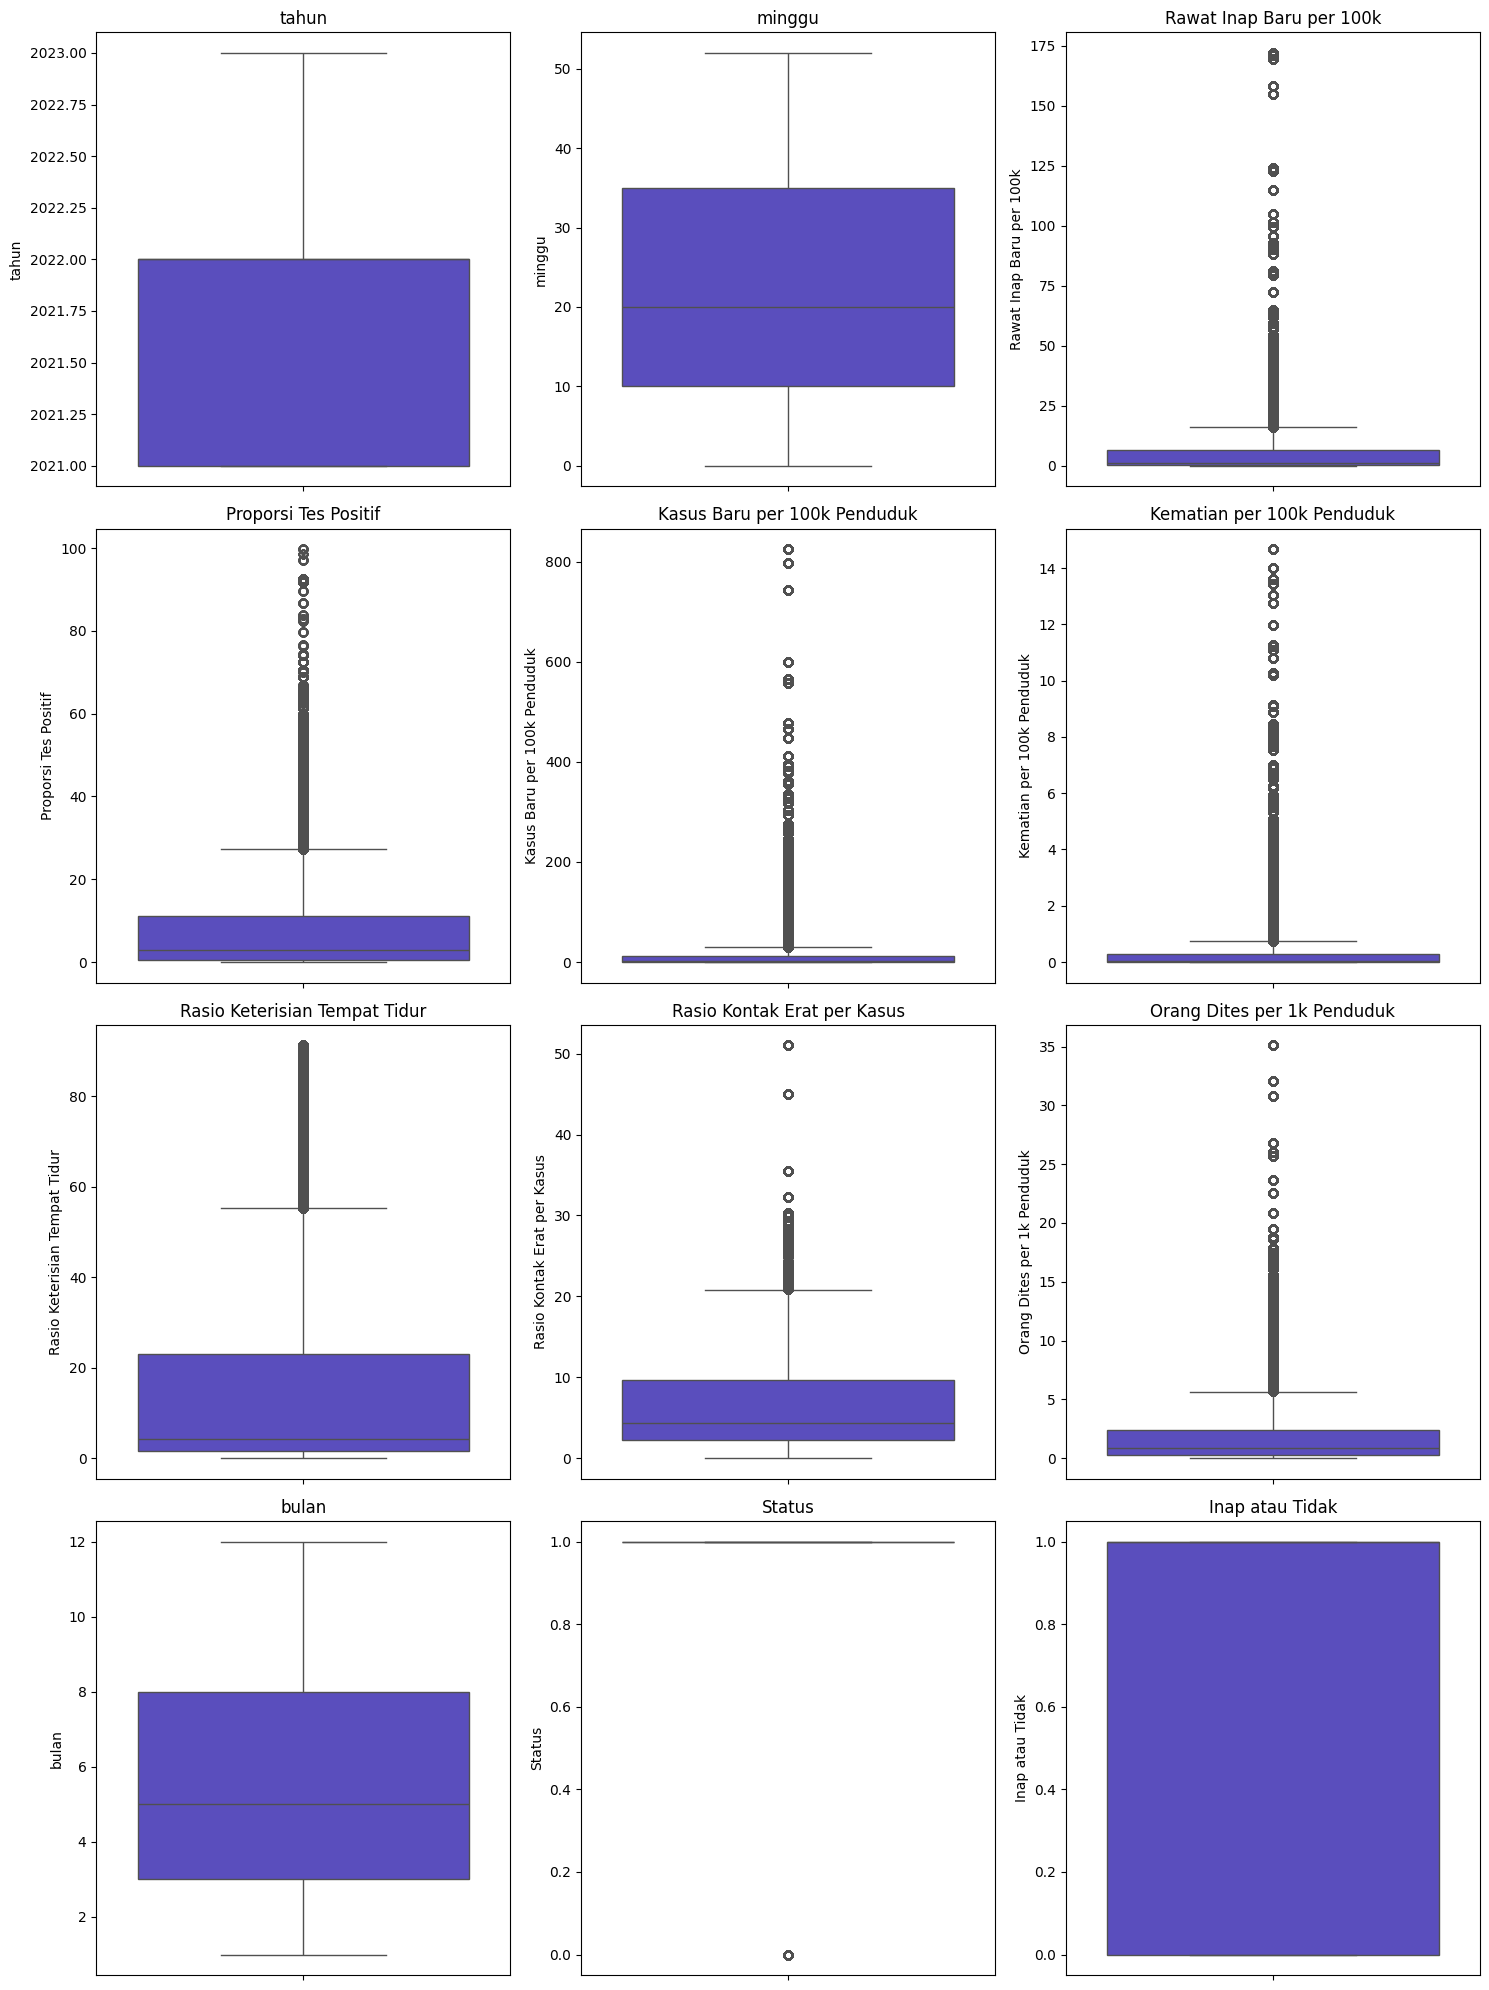

In [ ]:
# Warna untuk plot
colors = ['#4C3BCF', '#2D2926']

# Membuat subplot dengan jumlah yang cukup untuk menampung semua fitur
num_plots = len(numerical_features)
rows = (num_plots // 3) + (1 if num_plots % 3 != 0 else 0)
cols = 3

fig, axes = plt.subplots(nrows=rows, ncols=cols, figsize=(15, 5 * rows))

# Flatten the axes array for easy iteration
axes = axes.flatten()

for i, feature in enumerate(numerical_features):
    sns.boxplot(df_fe[feature], color=colors[0], ax=axes[i])
    axes[i].set_title(feature)

# Remove any unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

Membuat Distribusi Data yang Skew menjadi distribusi data normal

In [ ]:
df_fe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2030203 entries, 0 to 2030202
Data columns (total 13 columns):
 #   Column                         Dtype  
---  ------                         -----  
 0   tahun                          int64  
 1   minggu                         int64  
 2   nama_provinsi                  object 
 3   Rawat Inap Baru per 100k       float64
 4   Proporsi Tes Positif           float64
 5   Kasus Baru per 100k Penduduk   float64
 6   Kematian per 100k Penduduk     float64
 7   Rasio Keterisian Tempat Tidur  float64
 8   Rasio Kontak Erat per Kasus    float64
 9   Orang Dites per 1k Penduduk    float64
 10  bulan                          int64  
 11  Status                         int64  
 12  Inap atau Tidak                int64  
dtypes: float64(7), int64(5), object(1)
memory usage: 201.4+ MB


In [ ]:
df_bfr_merge = df_fe.copy()

In [ ]:
import numpy as np

In [ ]:
df_fe["Rawat Inap Baru per 100k"] = np.log1p(df_fe["Rawat Inap Baru per 100k"])
df_fe["Proporsi Tes Positif"] = np.log1p(df_fe["Proporsi Tes Positif"])
df_fe["Kasus Baru per 100k Penduduk"] = np.log1p(df_fe["Kasus Baru per 100k Penduduk"])
df_fe["Kematian per 100k Penduduk"] = np.log1p(df_fe["Kematian per 100k Penduduk"])
df_fe["Rasio Keterisian Tempat Tidur"] = np.log1p(df_fe["Rasio Keterisian Tempat Tidur"])
df_fe["Rasio Kontak Erat per Kasus"] = np.log1p(df_fe["Rasio Kontak Erat per Kasus"])
df_fe["Orang Dites per 1k Penduduk"] = np.log1p(df_fe["Orang Dites per 1k Penduduk"])

In [ ]:
df_aft_dis = df_fe.copy()

In [ ]:
# Mengatur fitur kategorikal dan numerikal
col = list(df_aft_dis.columns)
col.remove('nama_provinsi')
categorical_features = ['nama_provinsi']
numerical_features = [*col]
print('Categorical Features :', *categorical_features)
print('Numerical Features :', *numerical_features)

Categorical Features : nama_provinsi
Numerical Features : tahun minggu Rawat Inap Baru per 100k Proporsi Tes Positif Kasus Baru per 100k Penduduk Kematian per 100k Penduduk Rasio Keterisian Tempat Tidur Rasio Kontak Erat per Kasus Orang Dites per 1k Penduduk bulan Status Inap atau Tidak


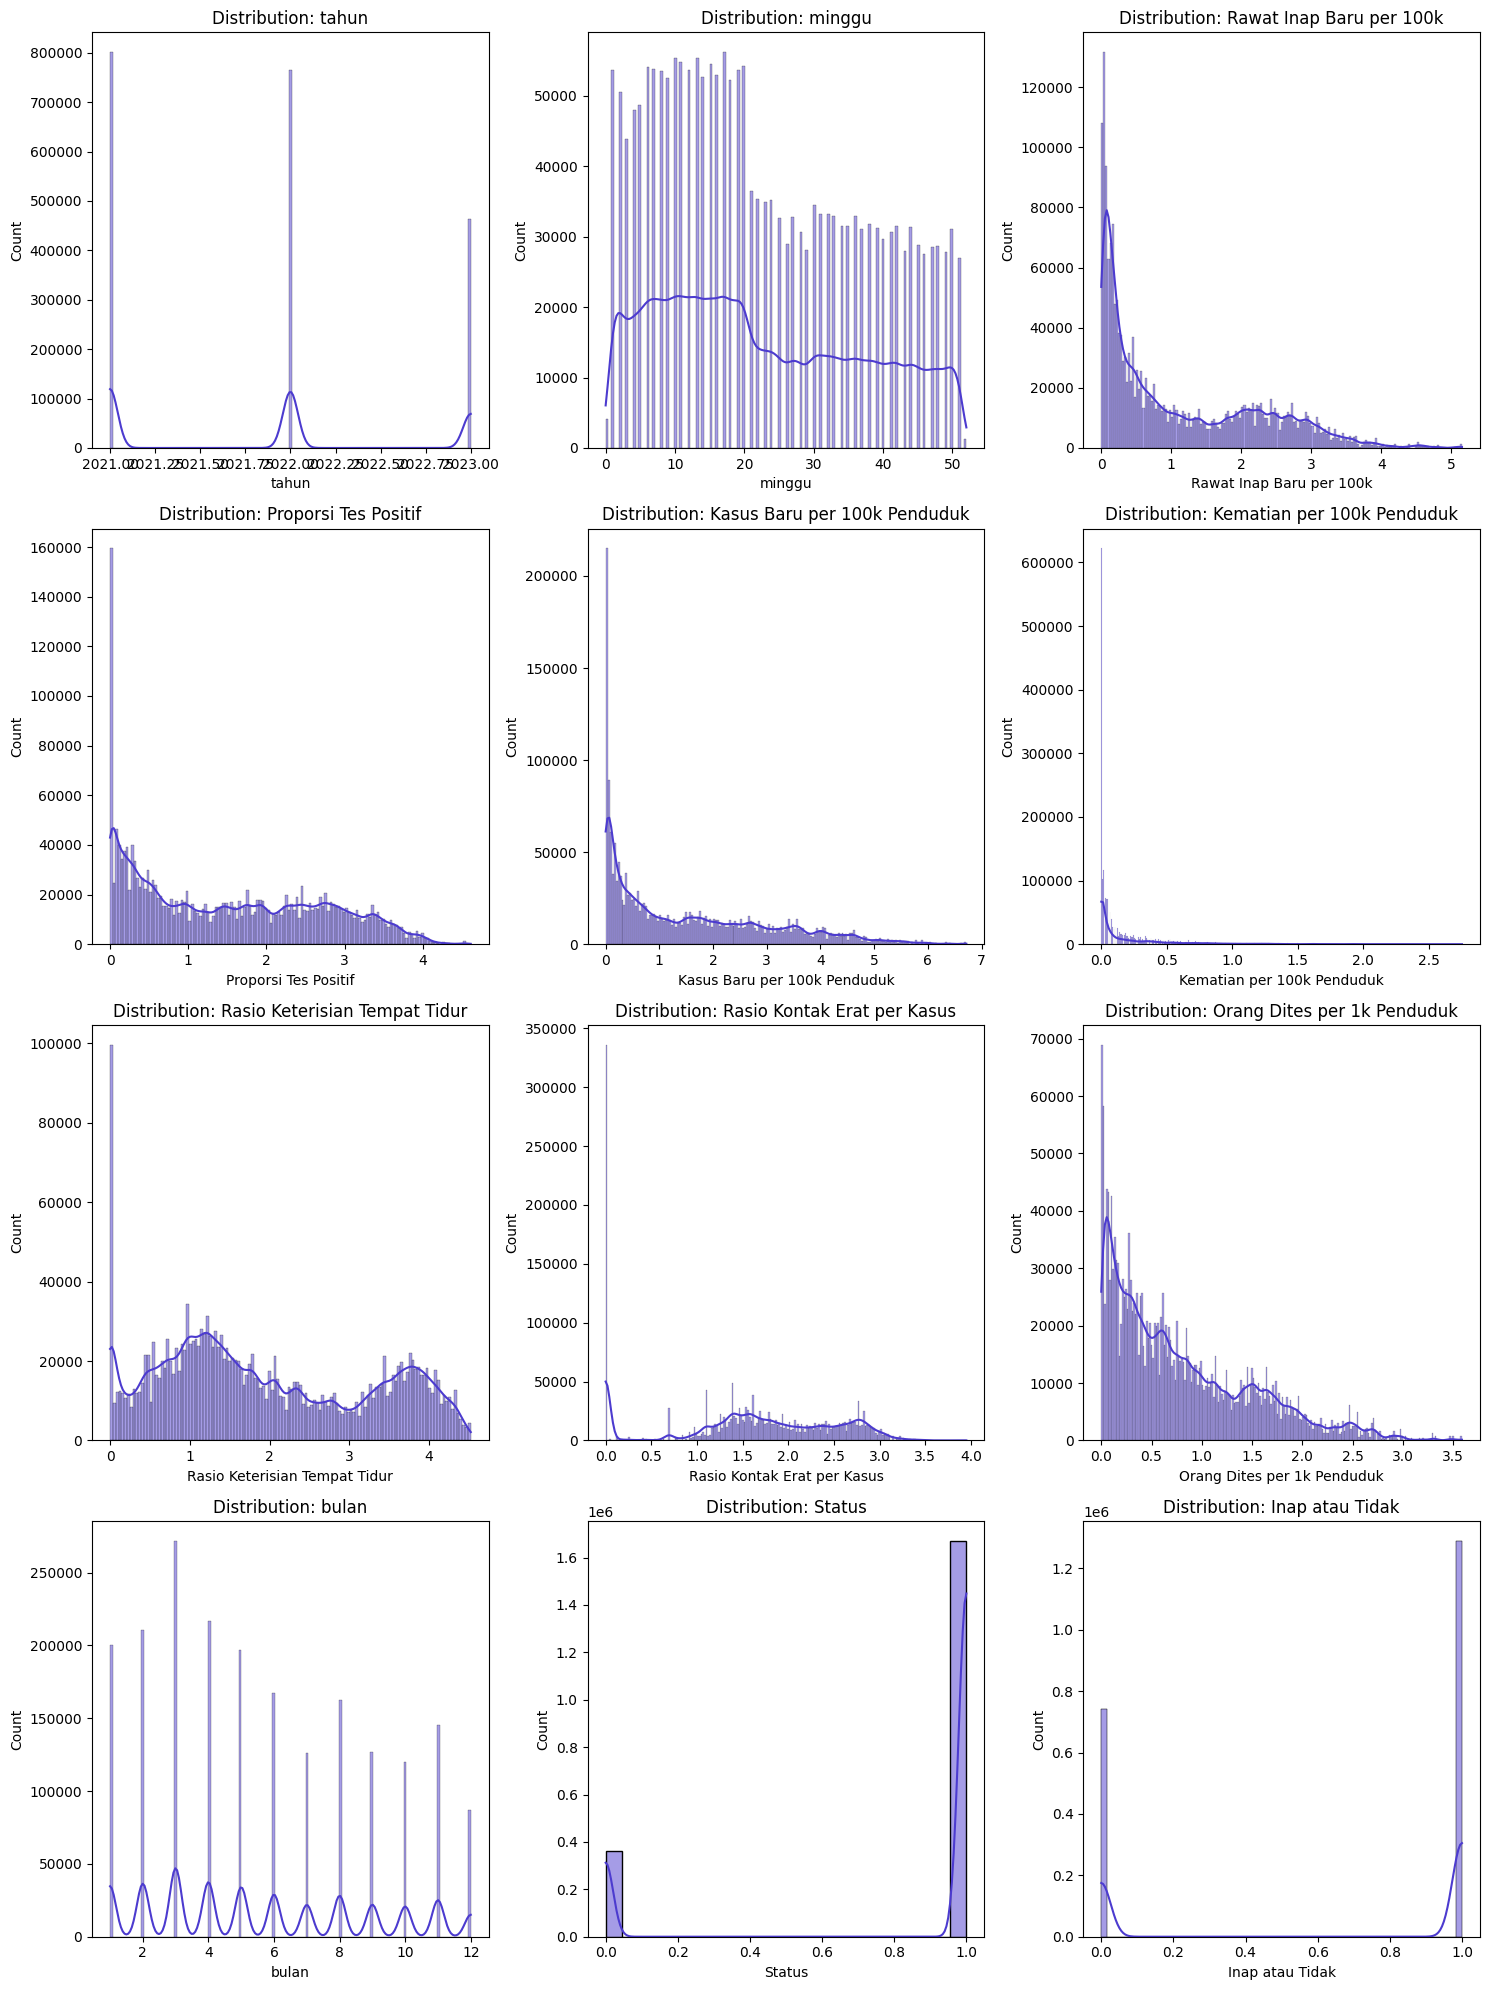

In [ ]:
# Warna untuk plot
colors = ['#4C3BCF', '#2D2926']

# Membuat subplot dengan jumlah yang cukup untuk menampung semua fitur
num_plots = len(numerical_features)
rows = (num_plots // 3) + (1 if num_plots % 3 != 0 else 0)
cols = 3

fig, ax = plt.subplots(nrows=rows, ncols=cols, figsize=(15, 5 * rows))

# Flatten the axes array for easy iteration
ax = ax.flatten()

for i, feature in enumerate(numerical_features):
    sns.histplot(df_aft_dis[feature], color=colors[0], ax=ax[i], kde=True)
    title = 'Distribution: ' + feature
    ax[i].set_title(title)

# Remove any unused subplots
for j in range(i + 1, len(ax)):
    fig.delaxes(ax[j])

plt.tight_layout()
plt.show()

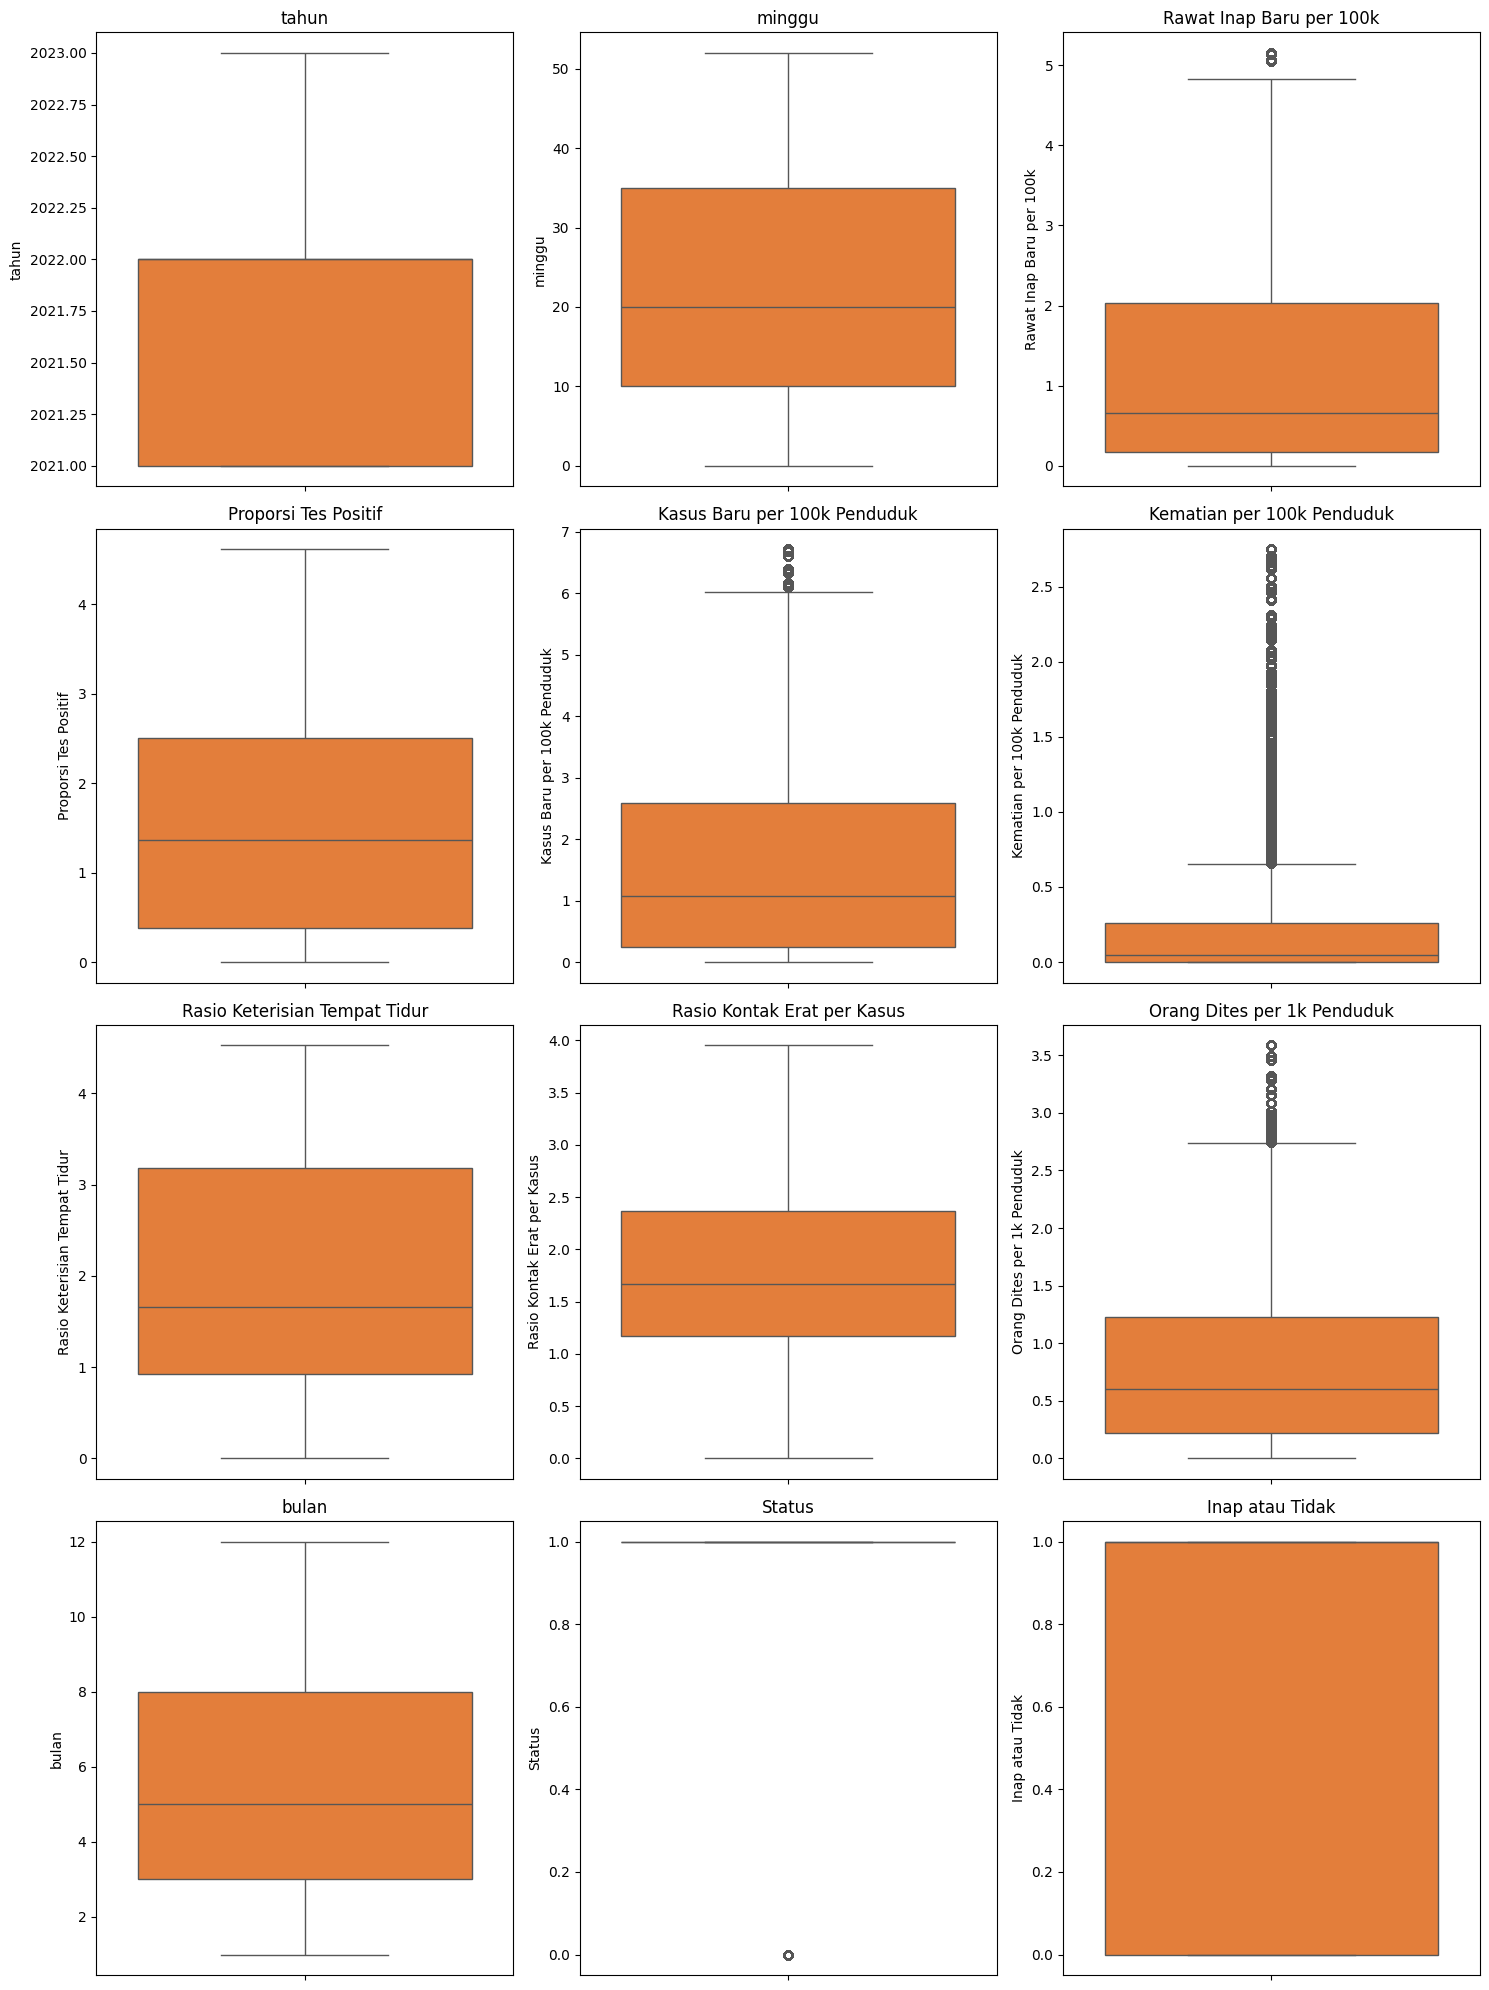

In [ ]:
# Warna untuk plot
colors = ['#FF781F', '#2D2926']

# Membuat subplot dengan jumlah yang cukup untuk menampung semua fitur
num_plots = len(numerical_features)
rows = (num_plots // 3) + (1 if num_plots % 3 != 0 else 0)
cols = 3

fig, axes = plt.subplots(nrows=rows, ncols=cols, figsize=(15, 5 * rows))

# Flatten the axes array for easy iteration
axes = axes.flatten()

for i, feature in enumerate(numerical_features):
    sns.boxplot(df_aft_dis[feature], color=colors[0], ax=axes[i])
    axes[i].set_title(feature)

# Remove any unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

In [ ]:
mms = MinMaxScaler() # Normalization
ss = StandardScaler() # Standardization

In [ ]:
df_aft_dis['Rasio Keterisian Tempat Tidur'] = ss.fit_transform(df_aft_dis[['Rasio Keterisian Tempat Tidur']])
df_aft_dis['Rasio Kontak Erat per Kasus'] = ss.fit_transform(df_aft_dis[['Rasio Kontak Erat per Kasus']])
df_aft_dis['tahun'] = ss.fit_transform(df_aft_dis[['tahun']])
df_aft_dis['minggu'] = ss.fit_transform(df_aft_dis[['minggu']])
df_aft_dis['bulan'] = ss.fit_transform(df_aft_dis[['bulan']])
df_aft_dis['Kasus Baru per 100k Penduduk'] = mms.fit_transform(df_aft_dis[['Kasus Baru per 100k Penduduk']])
df_aft_dis['Proporsi Tes Positif'] = mms.fit_transform(df_aft_dis[['Proporsi Tes Positif']])
df_aft_dis['Rawat Inap Baru per 100k'] = mms.fit_transform(df_aft_dis[['Rawat Inap Baru per 100k']])
df_aft_dis['Kematian per 100k Penduduk'] = mms.fit_transform(df_aft_dis[['Kematian per 100k Penduduk']])
df_aft_dis["Orang Dites per 1k Penduduk"] = mms.fit_transform(df_aft_dis[['Orang Dites per 1k Penduduk']])
df_aft_dis['Status'] = mms.fit_transform(df_aft_dis[['Status']])
df_aft_dis['Inap atau Tidak'] = mms.fit_transform(df_aft_dis[['Inap atau Tidak']])
df_aft_dis.head()

tahun    minggu nama_provinsi  Rawat Inap Baru per 100k  \
0 -1.080407  1.344618          ACEH                   0.04174   
1 -1.080407  1.344618          ACEH                   0.04174   
2 -1.080407  1.344618          ACEH                   0.04174   
3 -1.080407  1.344618          ACEH                   0.04174   
4 -1.080407  1.344618          ACEH                   0.04174   

   Proporsi Tes Positif  Kasus Baru per 100k Penduduk  \
0              0.180586                      0.148967   
1              0.180586                      0.148967   
2              0.180586                      0.148967   
3              0.180586                      0.148967   
4              0.180586                      0.148967   

   Kematian per 100k Penduduk  Rasio Keterisian Tempat Tidur  \
0                    0.072263                       0.321831   
1                    0.072263                       0.321831   
2                    0.072263                       0.321831   
3                    0.072263                       0.321831   
4                    0.072263                       0.321831   

   Rasio Kontak Erat per Kasus  Orang Dites per 1k Penduduk    bulan  Status  \
0                     0.761989                     0.235880  1.31767     1.0   
1                     0.761989                     0.029102  1.31767     1.0   
2                     0.761989                     0.005522  1.31767     1.0   
3                     1.031213                     0.235880  1.31767     1.0   
4                     1.031213                     0.029102  1.31767     1.0   

   Inap atau Tidak  
0              1.0  
1              1.0  
2              1.0  
3              1.0  
4              1.0

In [ ]:
df_aft_scl = df_aft_dis.copy()

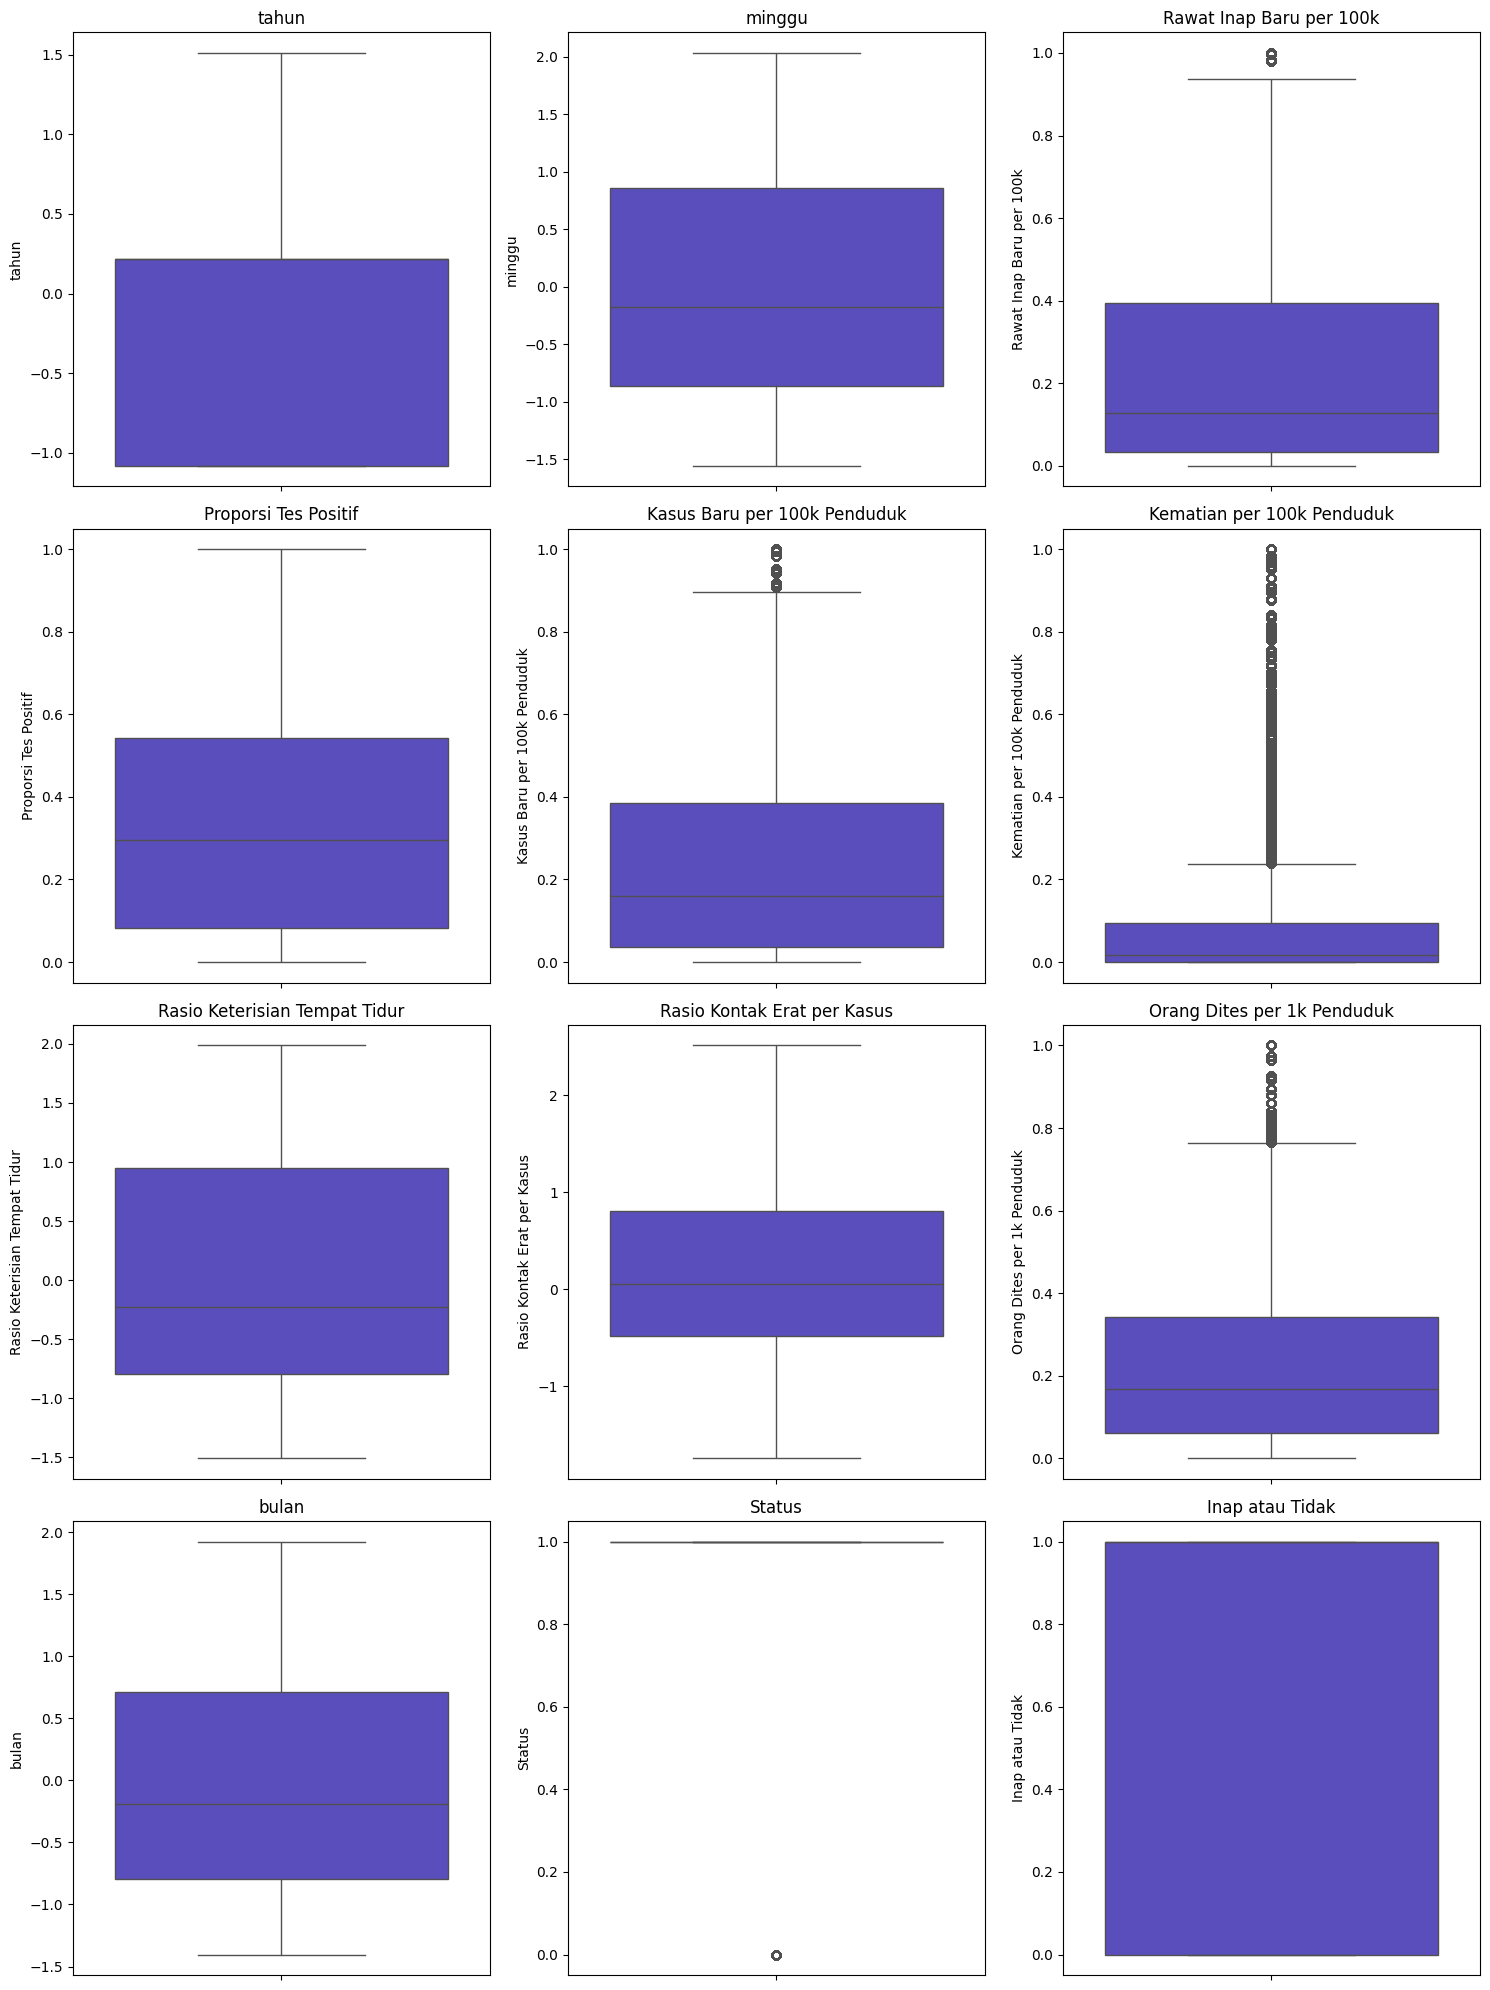

In [ ]:
# Warna untuk plot
colors = ['#4C3BCF', '#2D2926']

# Membuat subplot dengan jumlah yang cukup untuk menampung semua fitur
num_plots = len(numerical_features)
rows = (num_plots // 3) + (1 if num_plots % 3 != 0 else 0)
cols = 3

fig, axes = plt.subplots(nrows=rows, ncols=cols, figsize=(15, 5 * rows))

# Flatten the axes array for easy iteration
axes = axes.flatten()

for i, feature in enumerate(numerical_features):
    sns.boxplot(df_aft_scl[feature], color=colors[0], ax=axes[i])
    axes[i].set_title(feature)

# Remove any unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

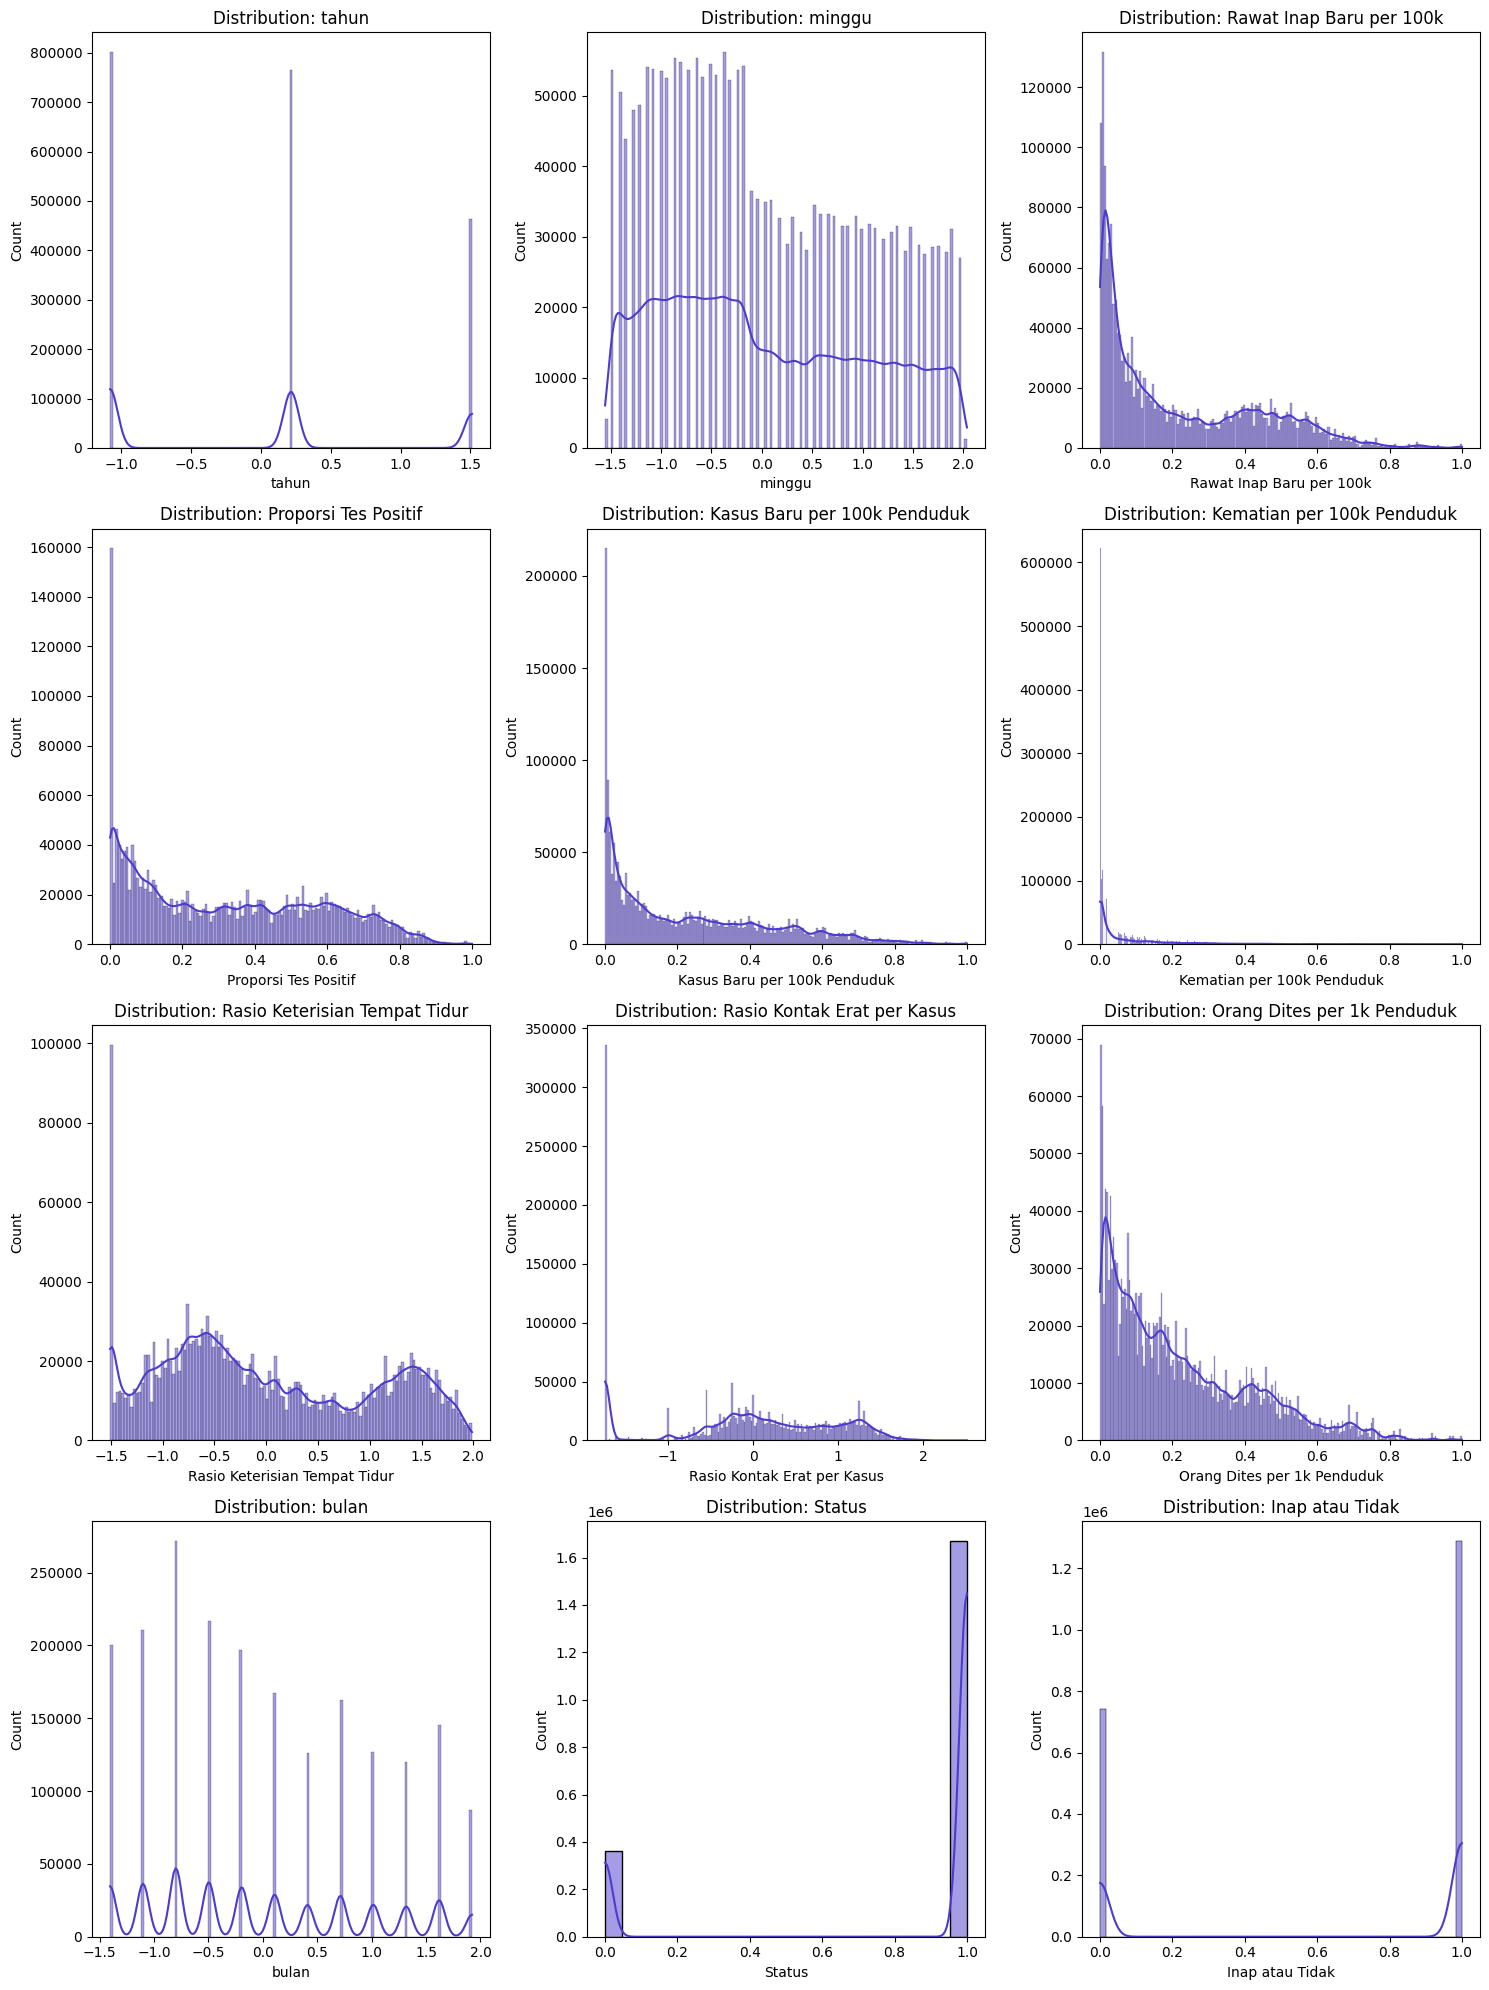

In [ ]:
# Warna untuk plot
colors = ['#4C3BCF', '#2D2926']

# Membuat subplot dengan jumlah yang cukup untuk menampung semua fitur
num_plots = len(numerical_features)
rows = (num_plots // 3) + (1 if num_plots % 3 != 0 else 0)
cols = 3

fig, ax = plt.subplots(nrows=rows, ncols=cols, figsize=(15, 5 * rows))

# Flatten the axes array for easy iteration
ax = ax.flatten()

for i, feature in enumerate(numerical_features):
    sns.histplot(df_aft_scl[feature], color=colors[0], ax=ax[i], kde=True)
    title = 'Distribution: ' + feature
    ax[i].set_title(title)

# Remove any unused subplots
for j in range(i + 1, len(ax)):
    fig.delaxes(ax[j])

plt.tight_layout()
plt.show()

In [ ]:
df_aft_scl.head()

tahun    minggu nama_provinsi  Rawat Inap Baru per 100k  \
0 -1.080407  1.344618          ACEH                   0.04174   
1 -1.080407  1.344618          ACEH                   0.04174   
2 -1.080407  1.344618          ACEH                   0.04174   
3 -1.080407  1.344618          ACEH                   0.04174   
4 -1.080407  1.344618          ACEH                   0.04174   

   Proporsi Tes Positif  Kasus Baru per 100k Penduduk  \
0              0.180586                      0.148967   
1              0.180586                      0.148967   
2              0.180586                      0.148967   
3              0.180586                      0.148967   
4              0.180586                      0.148967   

   Kematian per 100k Penduduk  Rasio Keterisian Tempat Tidur  \
0                    0.072263                       0.321831   
1                    0.072263                       0.321831   
2                    0.072263                       0.321831   
3                    0.072263                       0.321831   
4                    0.072263                       0.321831   

   Rasio Kontak Erat per Kasus  Orang Dites per 1k Penduduk    bulan  Status  \
0                     0.761989                     0.235880  1.31767     1.0   
1                     0.761989                     0.029102  1.31767     1.0   
2                     0.761989                     0.005522  1.31767     1.0   
3                     1.031213                     0.235880  1.31767     1.0   
4                     1.031213                     0.029102  1.31767     1.0   

   Inap atau Tidak  
0              1.0  
1              1.0  
2              1.0  
3              1.0  
4              1.0

In [ ]:
df_aft_scl.to_csv('for_mod_1.csv', index=False)

In [ ]:
df_aft_scl.shape

(2030203, 13)

#Modelling

In [ ]:
scaled_ds_1 = df_aft_scl.copy()

In [ ]:
scaled_ds_1.columns

Index(['tahun', 'minggu', 'nama_provinsi', 'Rawat Inap Baru per 100k',
       'Proporsi Tes Positif', 'Kasus Baru per 100k Penduduk',
       'Kematian per 100k Penduduk', 'Rasio Keterisian Tempat Tidur',
       'Rasio Kontak Erat per Kasus', 'Orang Dites per 1k Penduduk', 'bulan',
       'Status', 'Inap atau Tidak'],
      dtype='object')

In [ ]:
columns_to_process = ['tahun', 'Rawat Inap Baru per 100k',
       'Proporsi Tes Positif', 'Kasus Baru per 100k Penduduk',
       'Kematian per 100k Penduduk', 'Rasio Keterisian Tempat Tidur',
       'Rasio Kontak Erat per Kasus', 'Orang Dites per 1k Penduduk', 'bulan',
       'Status', 'Inap atau Tidak']
scaled_ds = scaled_ds_1[columns_to_process]

In [ ]:
#Initiating PCA to reduce dimentions to 3
pca = PCA(n_components=3)

# Fitting the PCA Model:
pca.fit(scaled_ds)

# Transforming the Data and Creating a DataFrame:
PCA_ds = pd.DataFrame(pca.transform(scaled_ds), columns=(["col1","col2", "col3"]))

# Descriptive statistics
PCA_ds.describe().T

count          mean       std       min       25%       50%  \
col1  2030203.0  7.234912e-17  1.194724 -3.174733 -0.913200 -0.073831   
col2  2030203.0 -1.961042e-16  1.033064 -2.158810 -0.788975  0.012505   
col3  2030203.0  9.609217e-17  0.964180 -2.742749 -0.669077 -0.000117   

           75%       max  
col1  0.946100  3.203458  
col2  0.769383  2.497897  
col3  0.659761  3.275077

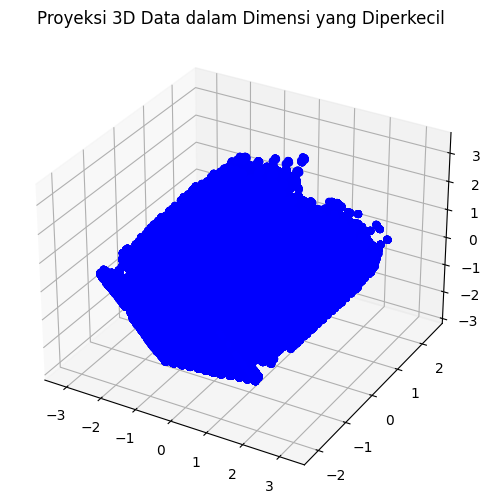

In [ ]:
#A 3D Projection Of Data In The Reduced Dimension
x =PCA_ds["col1"]
y =PCA_ds["col2"]
z =PCA_ds["col3"]
#To plot
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111, projection="3d")
ax.scatter(x,y,z, c="blue", marker="o" )
ax.set_title("Proyeksi 3D Data dalam Dimensi yang Diperkecil")
plt.show()

Elbow Method untuk menentukan jumlah cluster yang akan dibentuk:


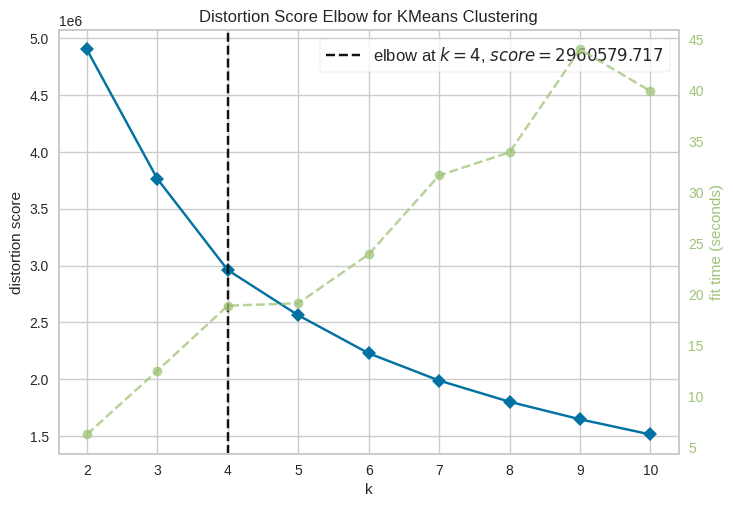

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [ ]:
# Quick examination of elbow method to find numbers of clusters to make.
print('Elbow Method untuk menentukan jumlah cluster yang akan dibentuk:')
Elbow_M = KElbowVisualizer(KMeans(random_state=42), k=10)
Elbow_M.fit(PCA_ds)
Elbow_M.show()

In [ ]:
# Initiating the KMeans Clustering model
kmeans = KMeans(n_clusters=4, random_state=42)
# Fit model and predict clusters
cluster_labels = kmeans.fit_predict(PCA_ds)  # Changed variable name from yhat_kmeans to cluster_labels
PCA_ds["Clusters"] = cluster_labels
# Adding the Clusters feature to the original dataframe.
df_bfr_merge["Clusters"] = cluster_labels
scaled_ds["Clusters"] = cluster_labels

In [ ]:
df_bfr_merge.head()

tahun  minggu nama_provinsi  Rawat Inap Baru per 100k  \
0   2021      42          ACEH                      0.24   
1   2021      42          ACEH                      0.24   
2   2021      42          ACEH                      0.24   
3   2021      42          ACEH                      0.24   
4   2021      42          ACEH                      0.24   

   Proporsi Tes Positif  Kasus Baru per 100k Penduduk  \
0                   1.3                          1.72   
1                   1.3                          1.72   
2                   1.3                          1.72   
3                   1.3                          1.72   
4                   1.3                          1.72   

   Kematian per 100k Penduduk  Rasio Keterisian Tempat Tidur  \
0                        0.22                           9.68   
1                        0.22                           9.68   
2                        0.22                           9.68   
3                        0.22                           9.68   
4                        0.22                           9.68   

   Rasio Kontak Erat per Kasus  Orang Dites per 1k Penduduk  bulan  Status  \
0                         9.21                         1.33     10       1   
1                         9.21                         0.11     10       1   
2                         9.21                         0.02     10       1   
3                        12.11                         1.33     10       1   
4                        12.11                         0.11     10       1   

   Inap atau Tidak  Clusters  
0                1         1  
1                1         1  
2                1         1  
3                1         1  
4                1         1

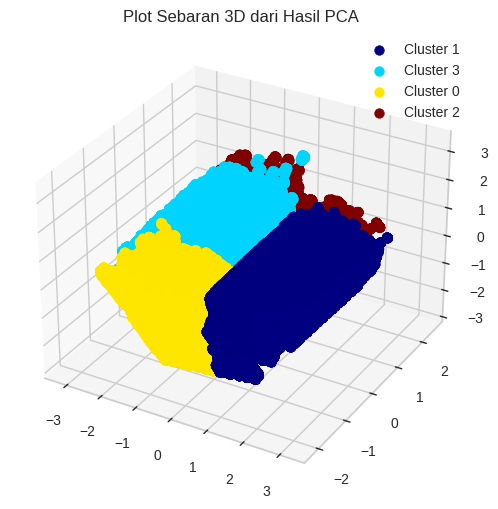

In [ ]:
# Create a new figure for the 3D plot
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

# Extract columns for the plot
x = PCA_ds['col1']
y = PCA_ds['col2']
z = PCA_ds['col3']

# Get unique clusters
clusters = PCA_ds['Clusters'].unique()

# Color map for clusters
colors = plt.cm.jet(np.linspace(0, 1, len(clusters)))

# Plot each cluster
for cluster, color in zip(clusters, colors):
    ix = PCA_ds['Clusters'] == cluster
    ax.scatter(x[ix], y[ix], z[ix], c=[color], label=f'Cluster {cluster}', s=50)

ax.set_title('Plot Sebaran 3D dari Hasil PCA')
ax.legend()
plt.show()

##Cluster Analysis

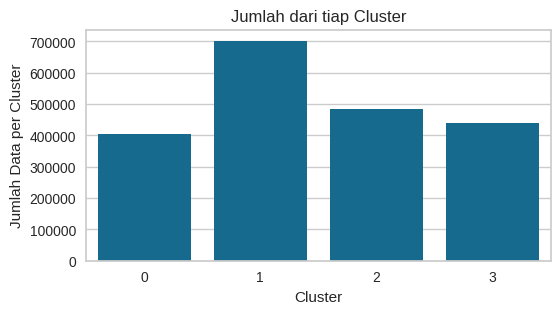

In [ ]:
# Create a bar plot for the number of customers in each cluster
plt.figure(figsize=(6, 3))
sns.countplot(x='Clusters', data=df_bfr_merge)
plt.title('Jumlah dari tiap Cluster')
plt.xlabel('Cluster')
plt.ylabel('Jumlah Data per Cluster')
plt.show()

In [ ]:
df_analysis = df_bfr_merge.copy()

In [ ]:
df_analysis.columns

Index(['tahun', 'minggu', 'nama_provinsi', 'Rawat Inap Baru per 100k',
       'Proporsi Tes Positif', 'Kasus Baru per 100k Penduduk',
       'Kematian per 100k Penduduk', 'Rasio Keterisian Tempat Tidur',
       'Rasio Kontak Erat per Kasus', 'Orang Dites per 1k Penduduk', 'bulan',
       'Status', 'Inap atau Tidak', 'Clusters'],
      dtype='object')

In [ ]:
df_analysis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2030203 entries, 0 to 2030202
Data columns (total 14 columns):
 #   Column                         Dtype  
---  ------                         -----  
 0   tahun                          int64  
 1   minggu                         int64  
 2   nama_provinsi                  object 
 3   Rawat Inap Baru per 100k       float64
 4   Proporsi Tes Positif           float64
 5   Kasus Baru per 100k Penduduk   float64
 6   Kematian per 100k Penduduk     float64
 7   Rasio Keterisian Tempat Tidur  float64
 8   Rasio Kontak Erat per Kasus    float64
 9   Orang Dites per 1k Penduduk    float64
 10  bulan                          int64  
 11  Status                         int64  
 12  Inap atau Tidak                int64  
 13  Clusters                       int32  
dtypes: float64(7), int32(1), int64(5), object(1)
memory usage: 209.1+ MB


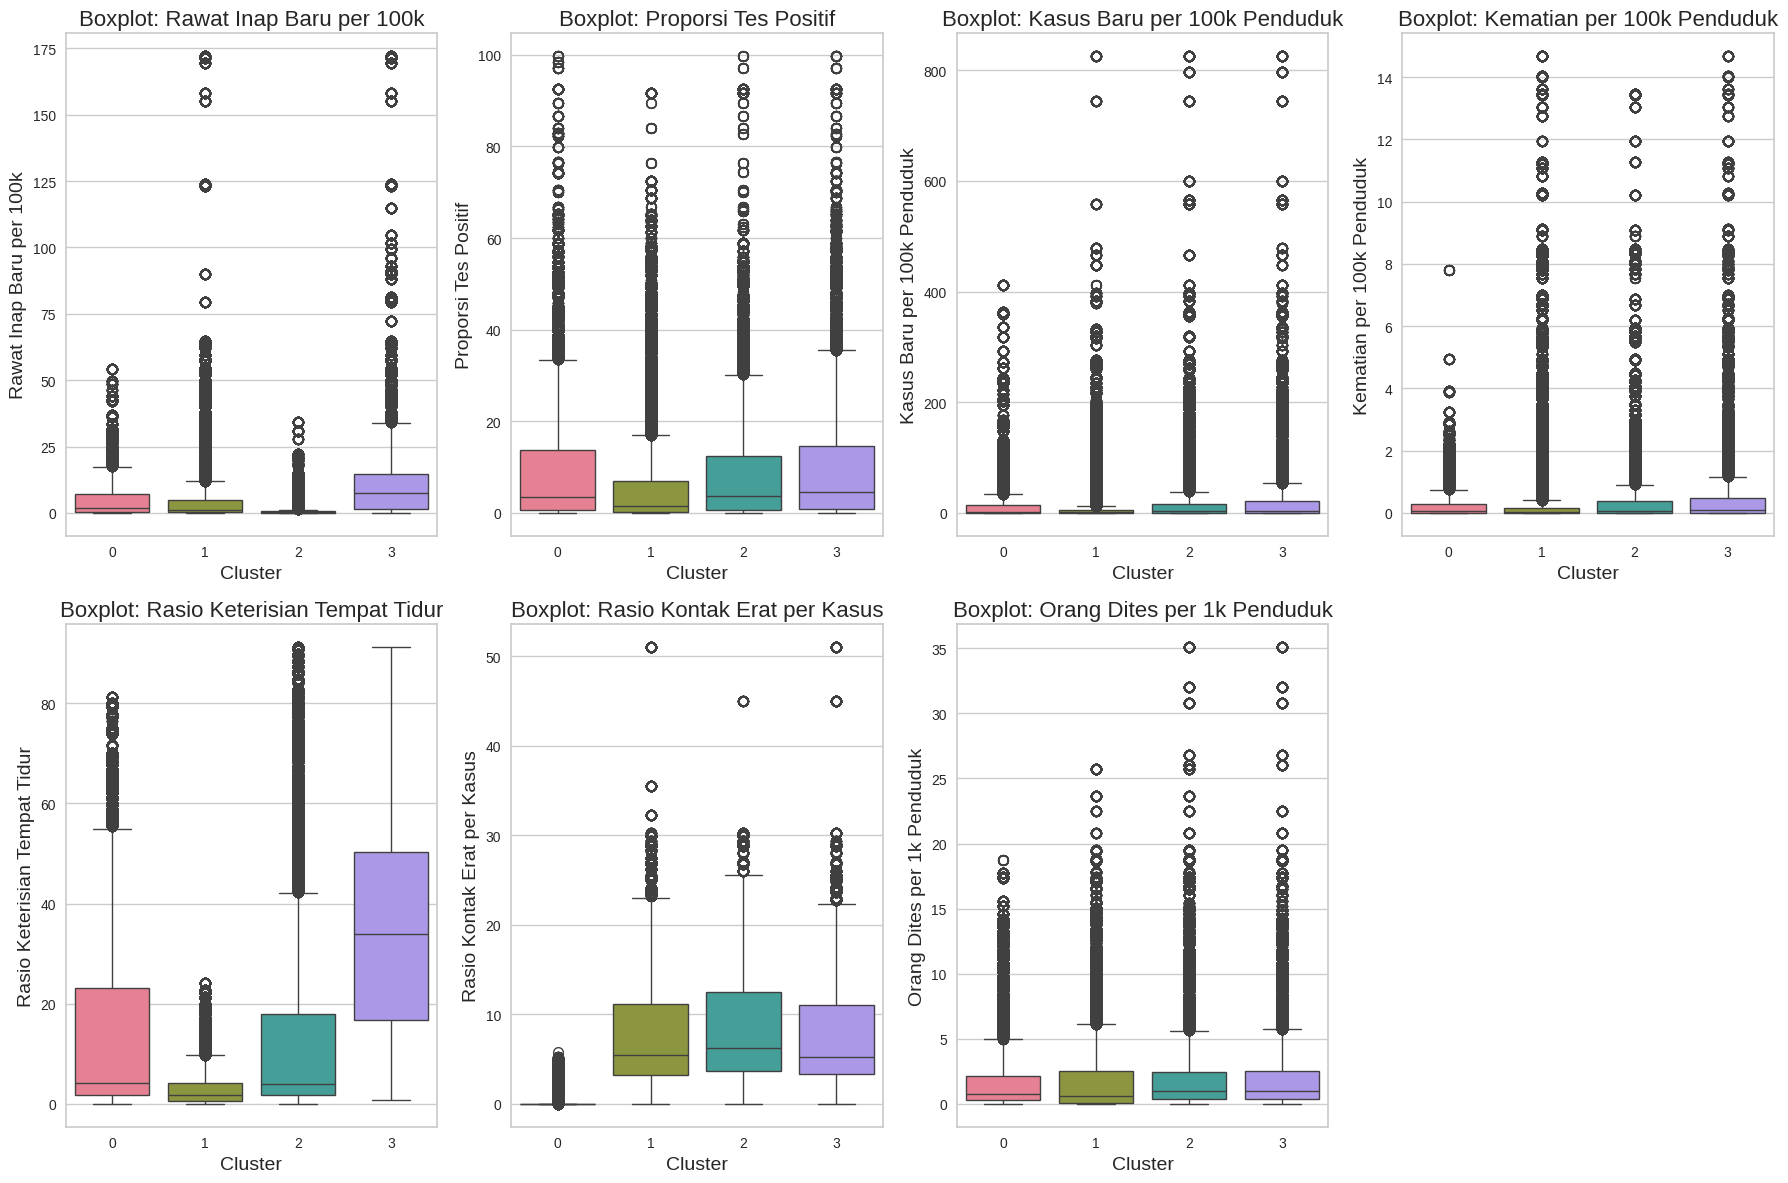

In [ ]:

# Menentukan fitur numerik yang akan digunakan
numerical_features = [
    'Rawat Inap Baru per 100k',
    'Proporsi Tes Positif',
    'Kasus Baru per 100k Penduduk',
    'Kematian per 100k Penduduk',
    'Rasio Keterisian Tempat Tidur',
    'Rasio Kontak Erat per Kasus',
    'Orang Dites per 1k Penduduk'
]

# Membuat subplot dengan 2 baris dan 4 kolom
fig, ax = plt.subplots(nrows=2, ncols=4, figsize=(18, 12))  # Mengatur figsize agar lebih besar

# Flatten the axes array for easy iteration
ax = ax.flatten()

# Menggunakan palet warna untuk memastikan jumlah warna sesuai dengan jumlah cluster yang unik
palette = sns.color_palette('husl', n_colors=len(df_analysis['Clusters'].unique()))

for i, feature in enumerate(numerical_features):
    sns.boxplot(x='Clusters', y=feature, data=df_analysis, ax=ax[i], palette='husl')
    ax[i].set_title(f'Boxplot: {feature}', fontsize=16)  # Mengatur ukuran font judul
    ax[i].set_xlabel('Cluster', fontsize=14)  # Mengatur ukuran font label x
    ax[i].set_ylabel(feature, fontsize=14)  # Mengatur ukuran font label y

# Remove any unused subplots
for j in range(len(numerical_features), len(ax)):
    fig.delaxes(ax[j])

plt.tight_layout()  # Menyusun layout subplot secara otomatis agar rapi
plt.show()

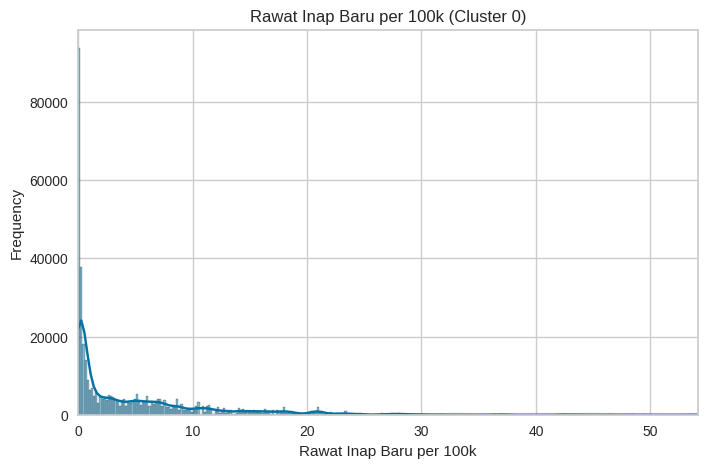

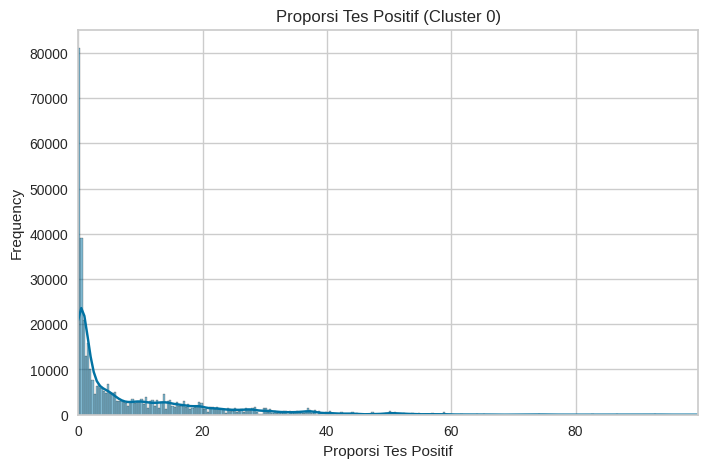

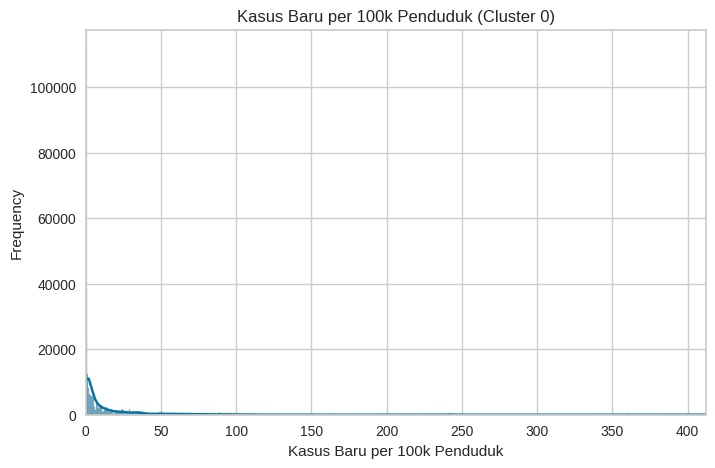

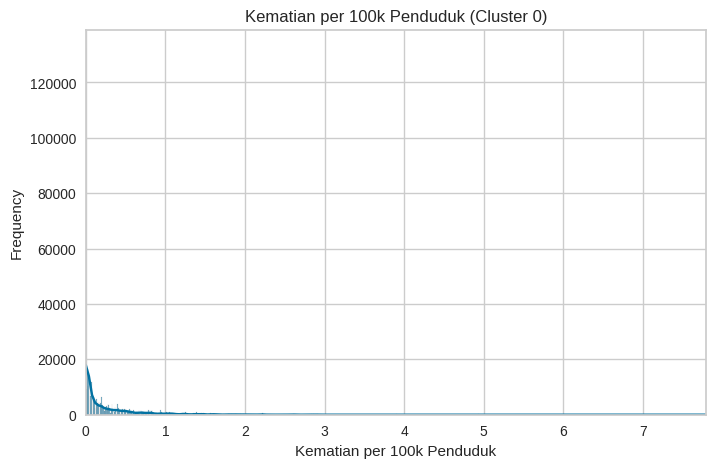

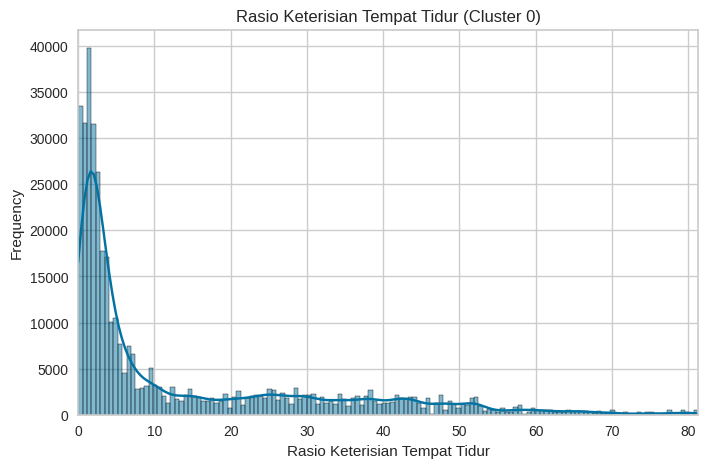

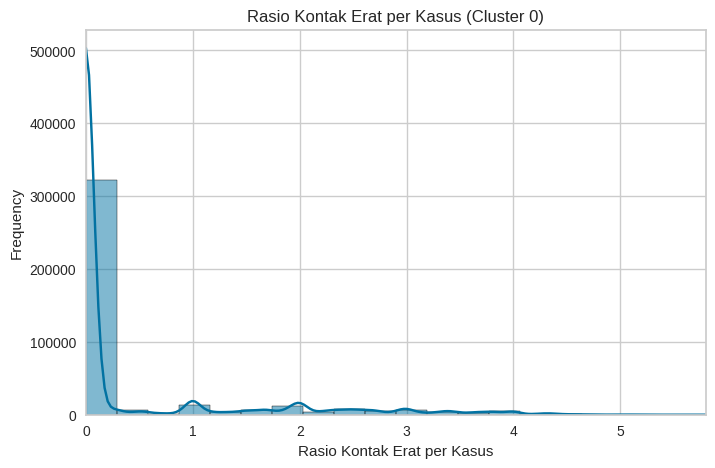

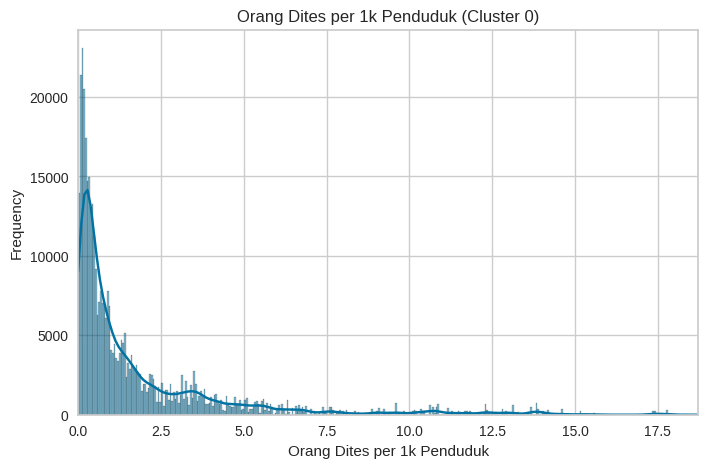

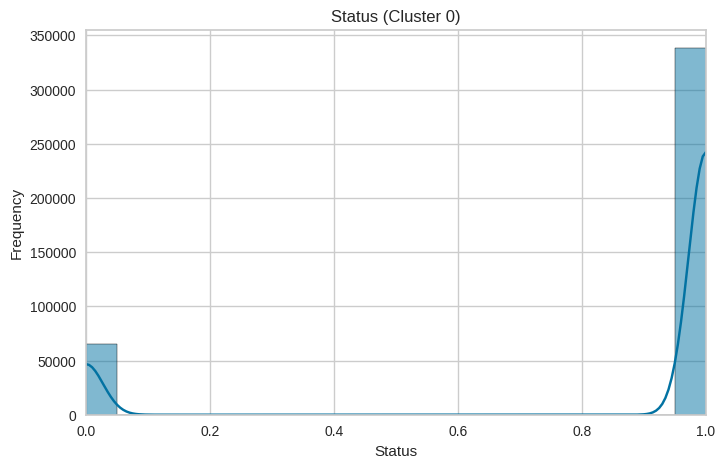

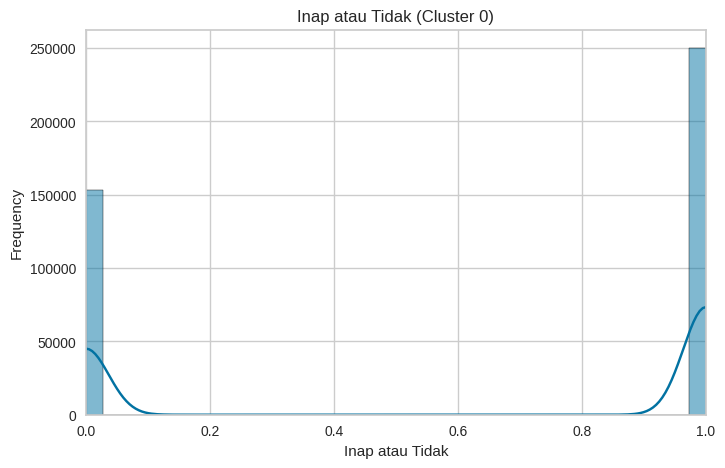

In [ ]:

# Daftar fitur yang akan digunakan
features = [
    'Rawat Inap Baru per 100k',
    'Proporsi Tes Positif',
    'Kasus Baru per 100k Penduduk',
    'Kematian per 100k Penduduk',
    'Rasio Keterisian Tempat Tidur',
    'Rasio Kontak Erat per Kasus',
    'Orang Dites per 1k Penduduk',
    'Status',
    'Inap atau Tidak'
]

# Menentukan cluster yang diinginkan
selected_cluster = 0

# Memfilter data untuk cluster yang dipilih
cluster_data = df_analysis[df_analysis['Clusters'] == selected_cluster]

# Membuat plot histogram untuk setiap fitur dalam cluster yang dipilih
for feature in features:
    plt.figure(figsize=(8, 5))
    sns.histplot(cluster_data[feature], kde=True)
    plt.title(f'{feature} (Cluster {selected_cluster})')
    plt.xlabel(feature)
    plt.ylabel('Frequency')

    # Mengatur nilai asli pada sumbu x
    plt.xlim(cluster_data[feature].min(), cluster_data[feature].max())

    plt.show()

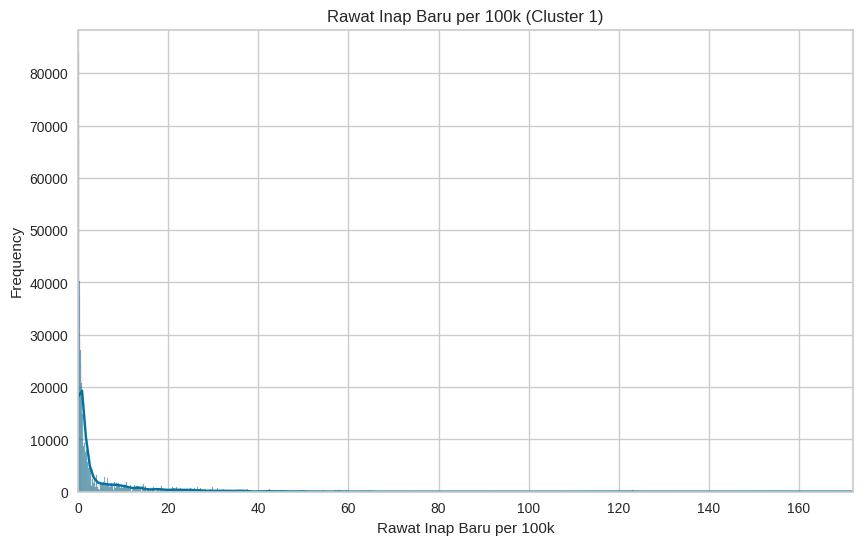

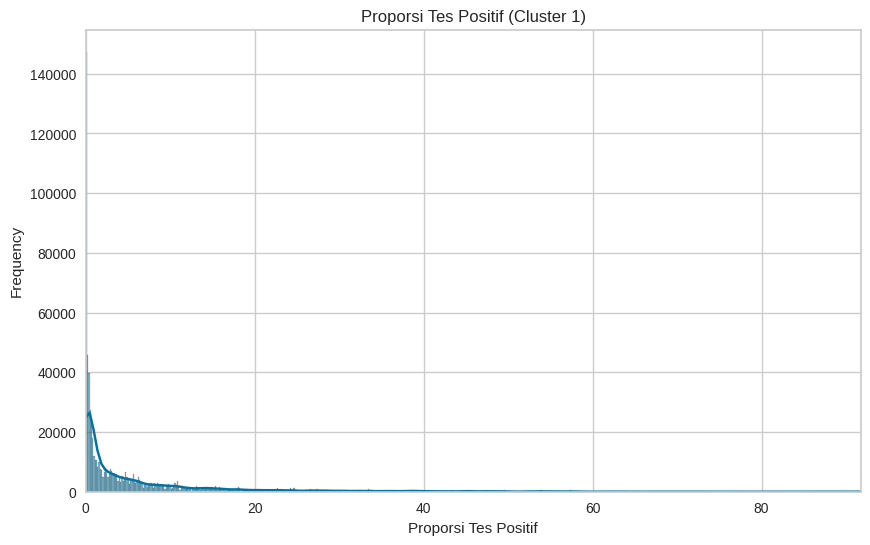

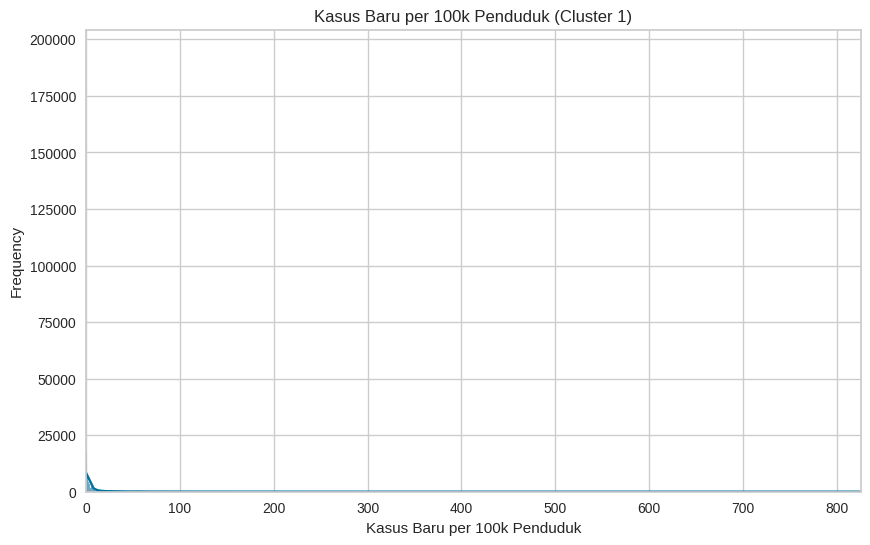

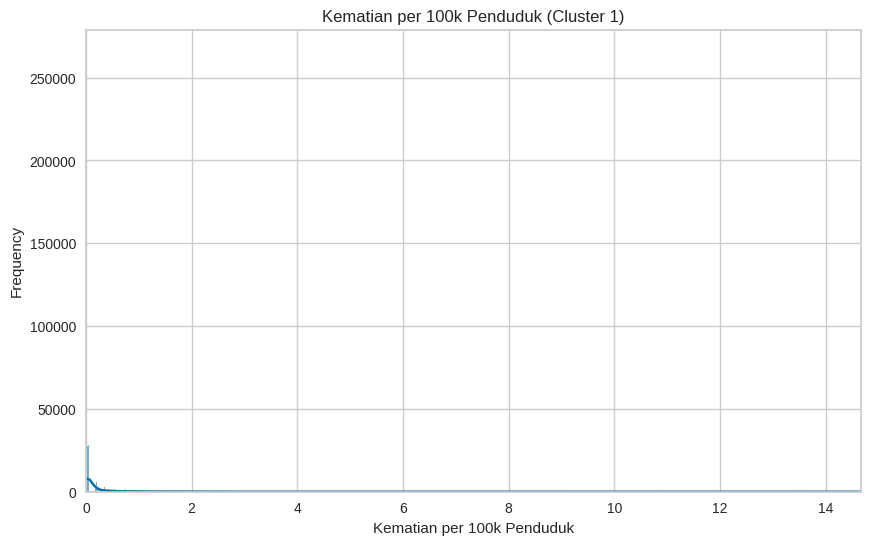

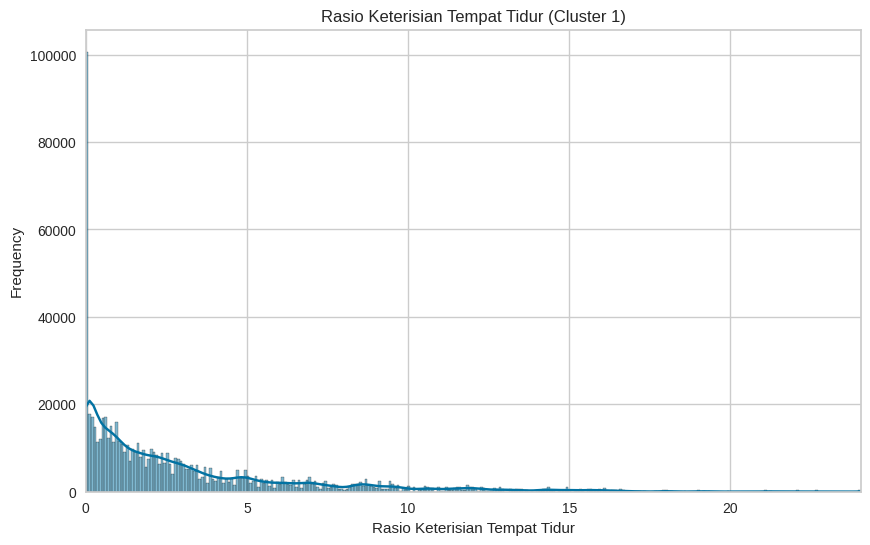

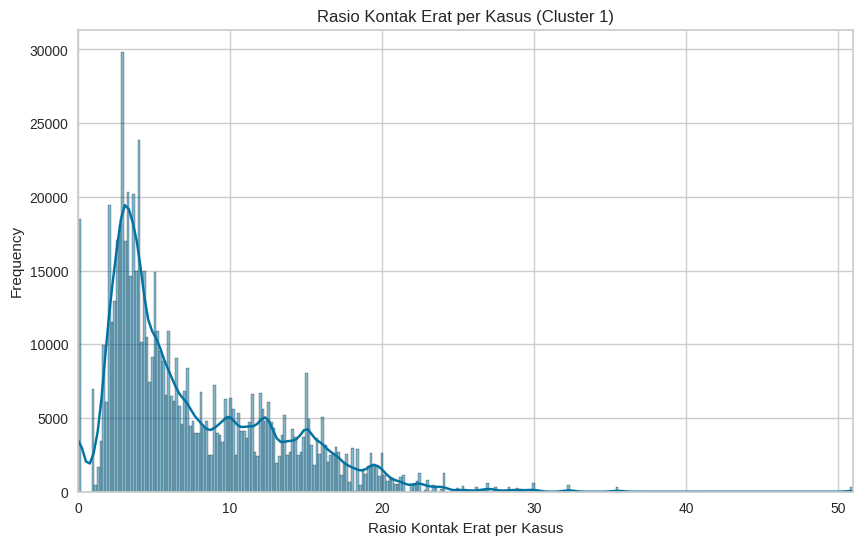

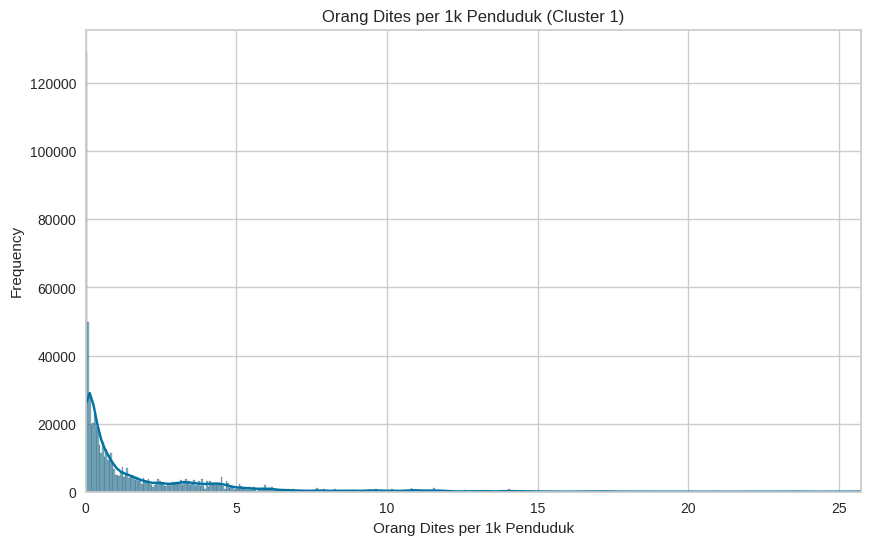

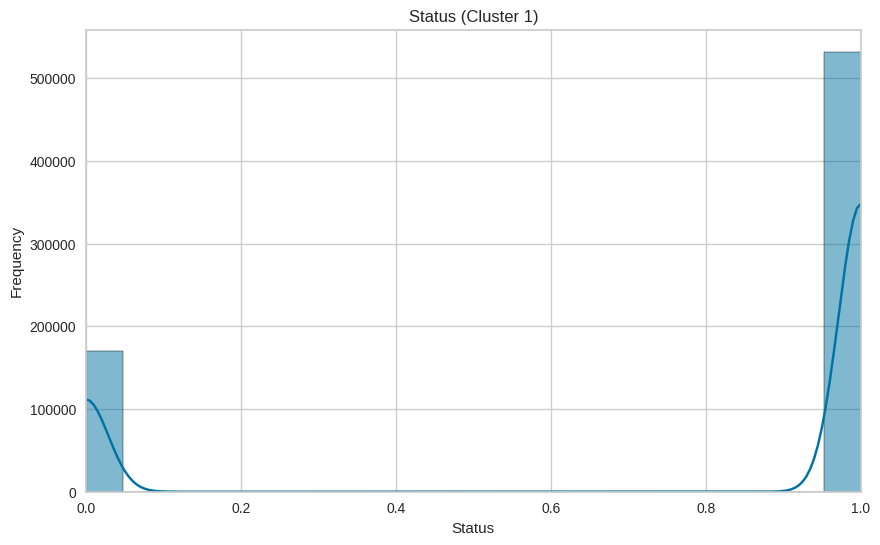

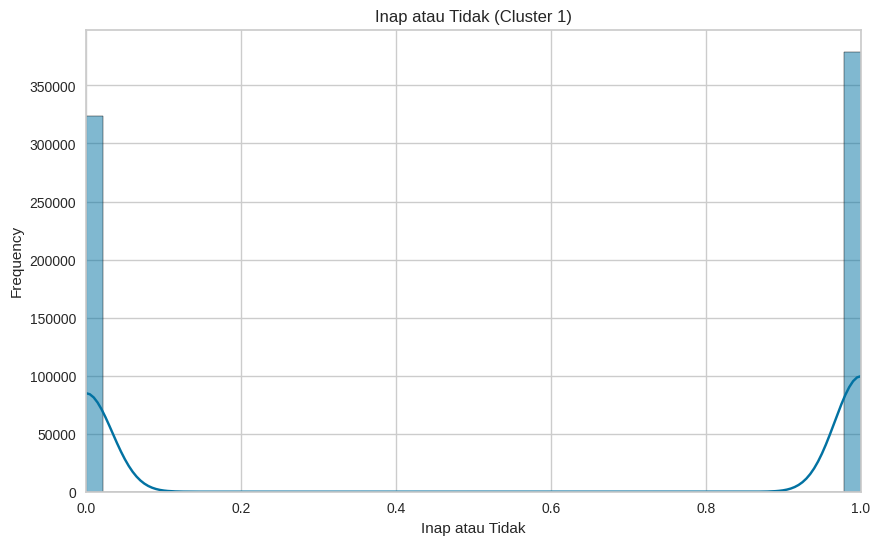

In [ ]:
# Daftar fitur yang akan digunakan
features = [
    'Rawat Inap Baru per 100k',
    'Proporsi Tes Positif',
    'Kasus Baru per 100k Penduduk',
    'Kematian per 100k Penduduk',
    'Rasio Keterisian Tempat Tidur',
    'Rasio Kontak Erat per Kasus',
    'Orang Dites per 1k Penduduk',
    'Status',
    'Inap atau Tidak'
]

# Menentukan cluster yang diinginkan
selected_cluster = 1

# Memfilter data untuk cluster yang dipilih
cluster_data = df_analysis[df_analysis['Clusters'] == selected_cluster]

# Membuat plot histogram untuk setiap fitur dalam cluster yang dipilih
for feature in features:
    plt.figure(figsize=(10, 6))
    sns.histplot(cluster_data[feature], kde=True)
    plt.title(f'{feature} (Cluster {selected_cluster})')
    plt.xlabel(feature)
    plt.ylabel('Frequency')

    # Mengatur nilai asli pada sumbu x
    plt.xlim(cluster_data[feature].min(), cluster_data[feature].max())

    plt.show()

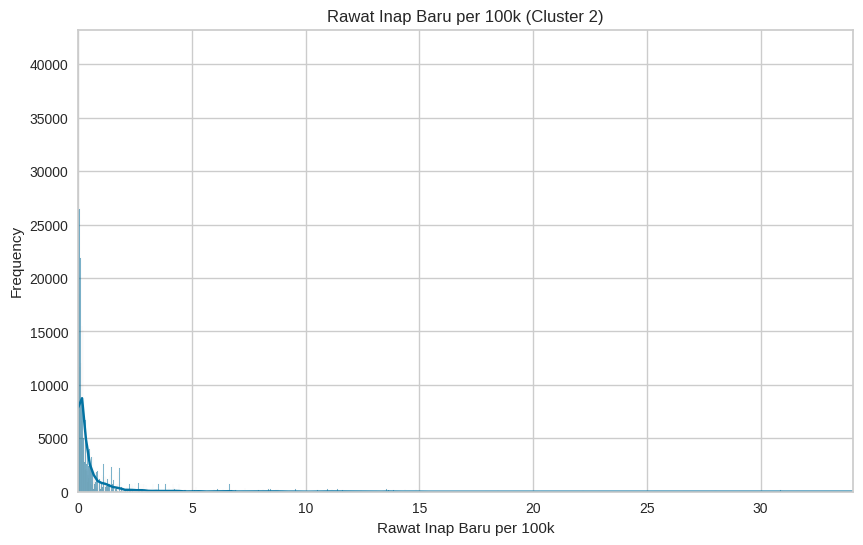

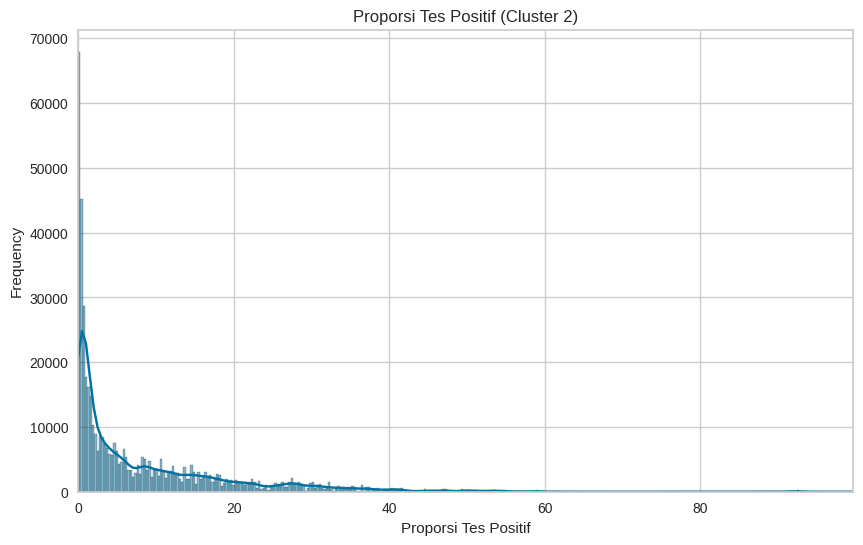

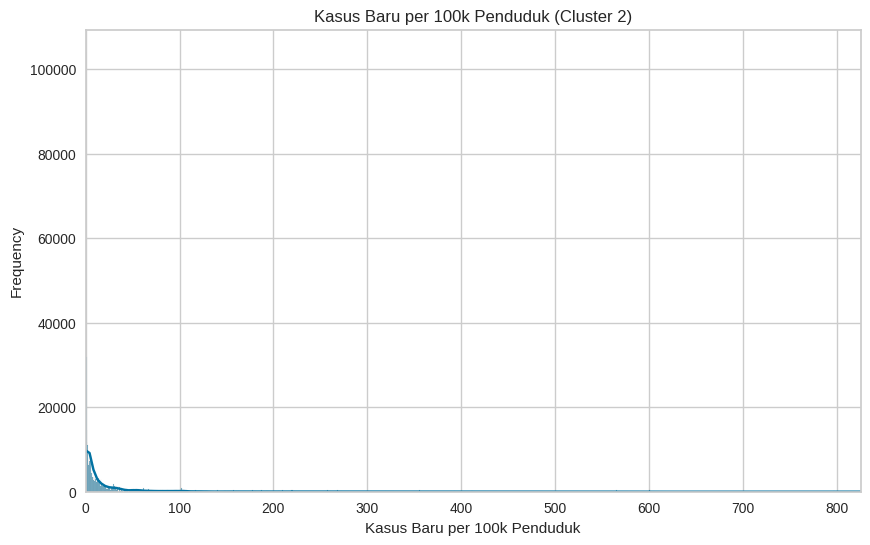

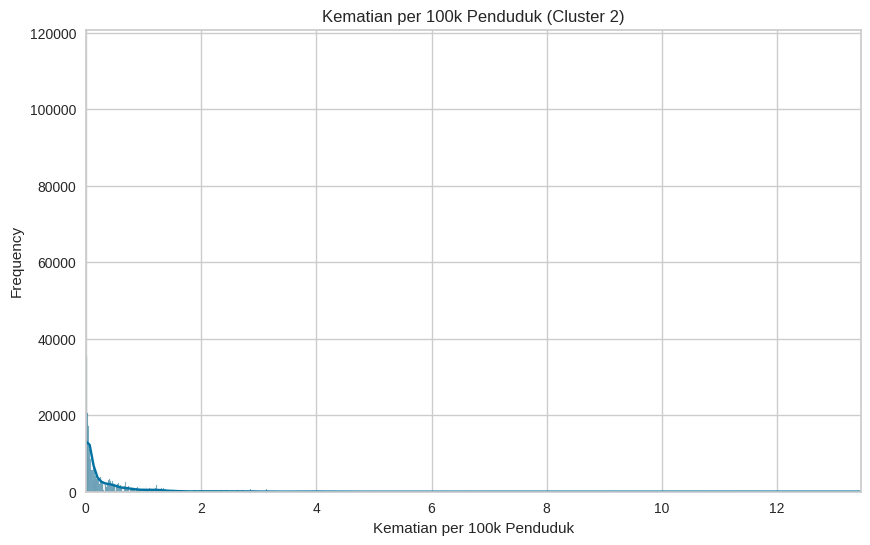

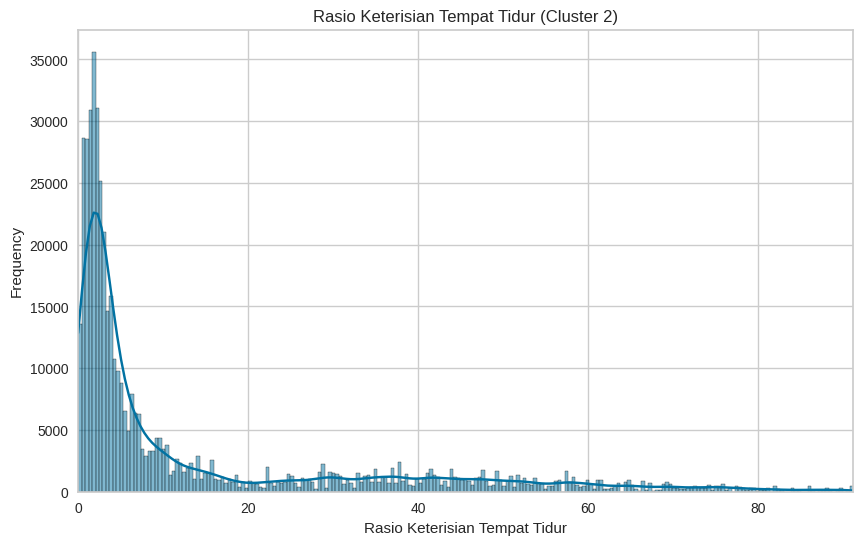

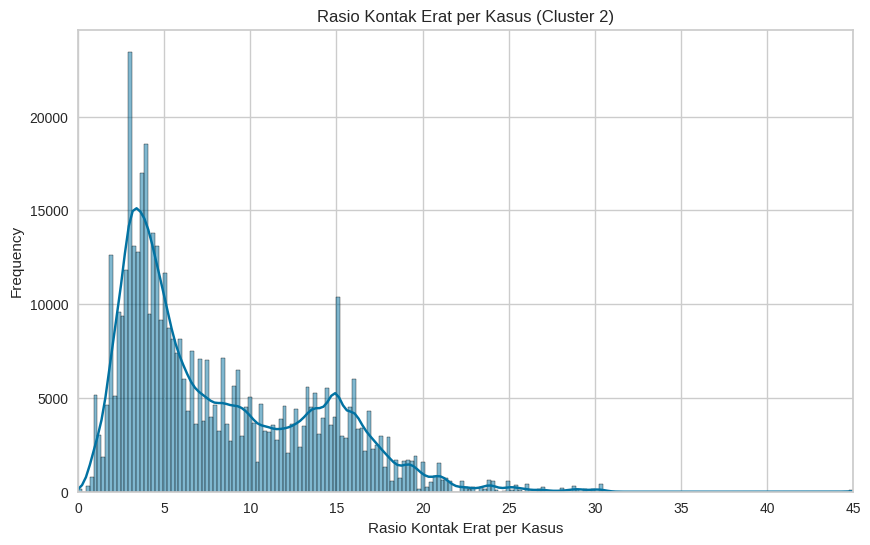

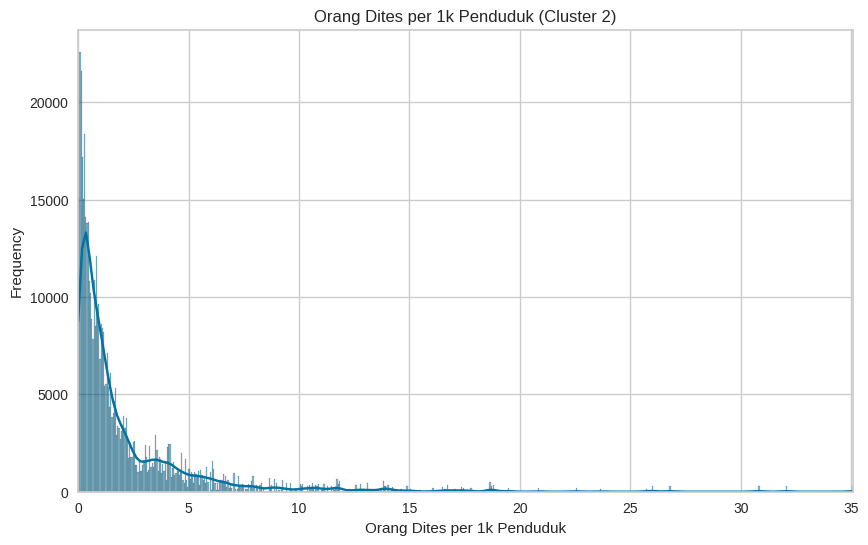

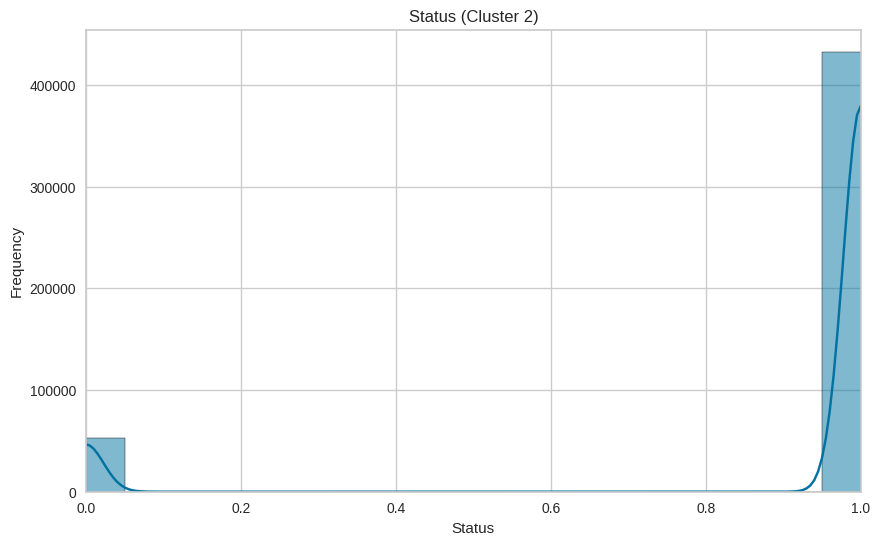

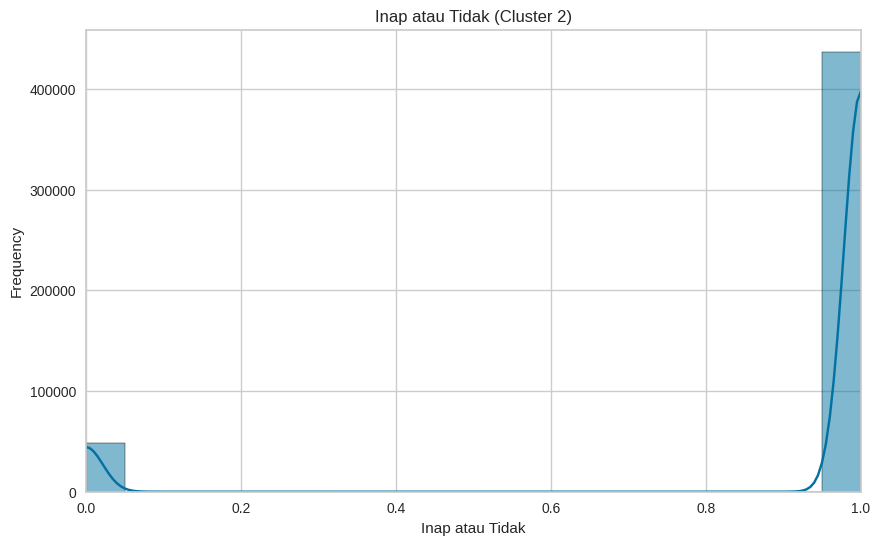

In [ ]:
# Daftar fitur yang akan digunakan
features = [
    'Rawat Inap Baru per 100k',
    'Proporsi Tes Positif',
    'Kasus Baru per 100k Penduduk',
    'Kematian per 100k Penduduk',
    'Rasio Keterisian Tempat Tidur',
    'Rasio Kontak Erat per Kasus',
    'Orang Dites per 1k Penduduk',
    'Status',
    'Inap atau Tidak'
]

# Menentukan cluster yang diinginkan
selected_cluster = 2

# Memfilter data untuk cluster yang dipilih
cluster_data = df_analysis[df_analysis['Clusters'] == selected_cluster]

# Membuat plot histogram untuk setiap fitur dalam cluster yang dipilih
for feature in features:
    plt.figure(figsize=(10, 6))
    sns.histplot(cluster_data[feature], kde=True)
    plt.title(f'{feature} (Cluster {selected_cluster})')
    plt.xlabel(feature)
    plt.ylabel('Frequency')

    # Mengatur nilai asli pada sumbu x
    plt.xlim(cluster_data[feature].min(), cluster_data[feature].max())

    plt.show()

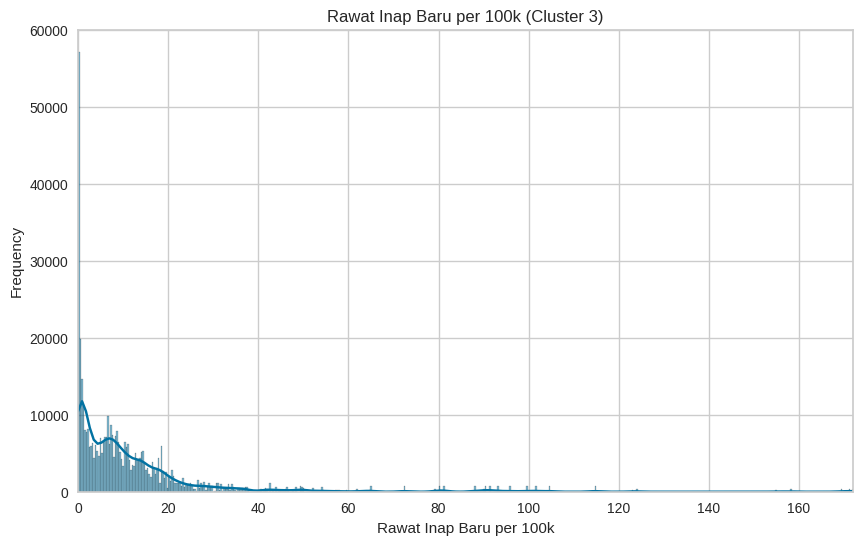

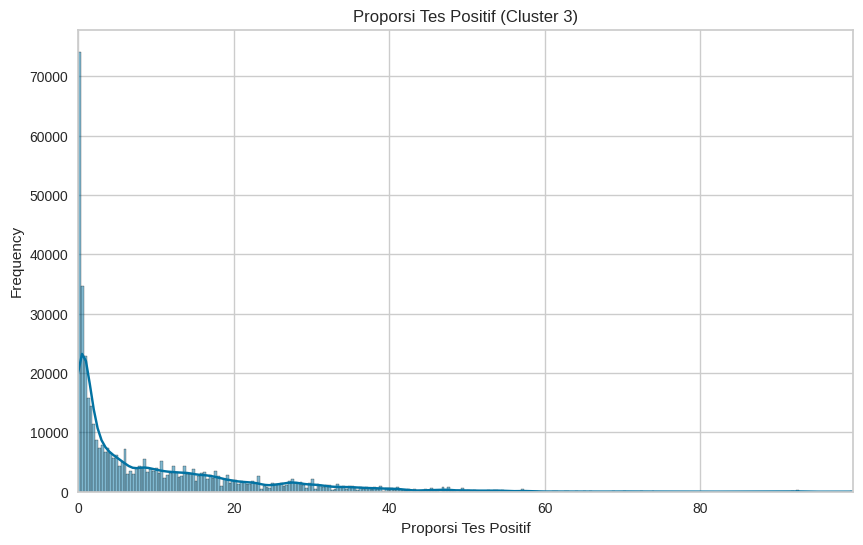

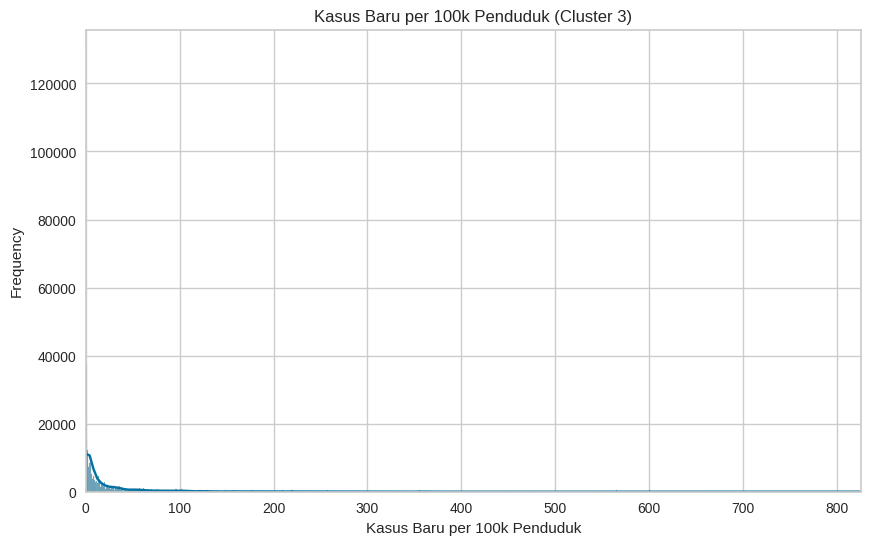

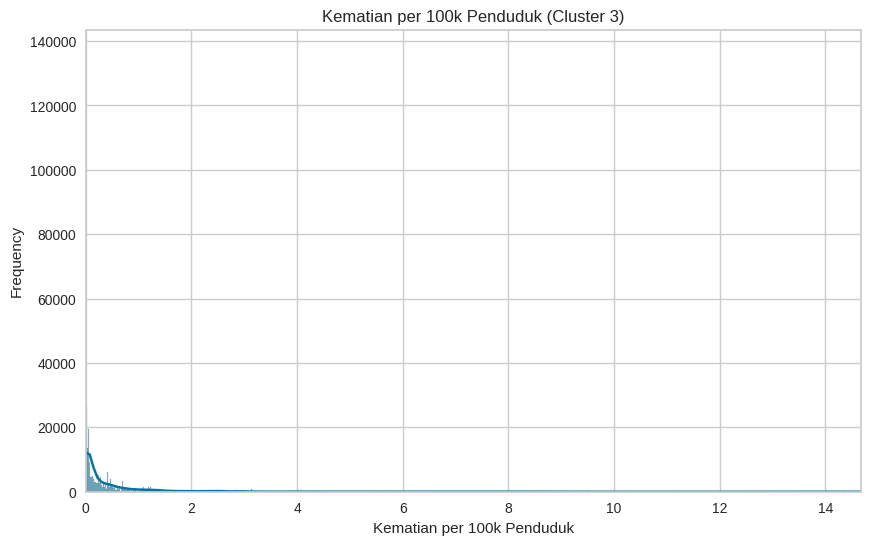

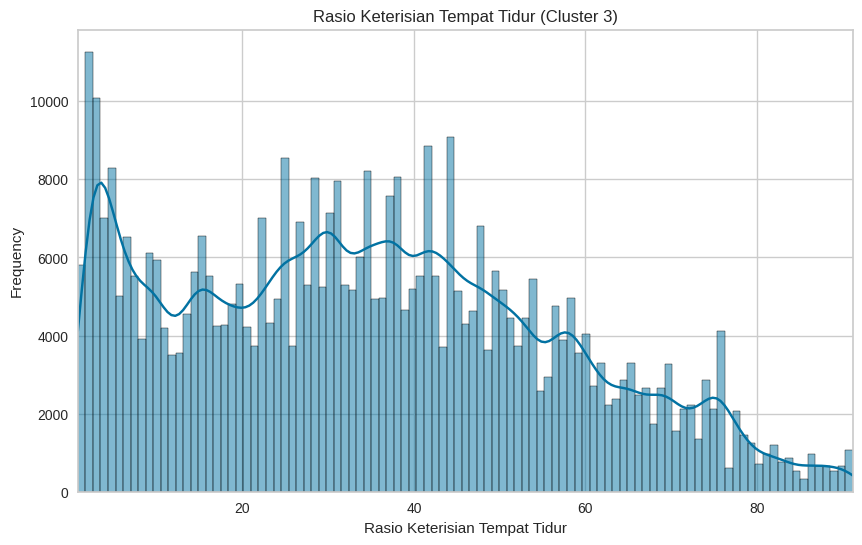

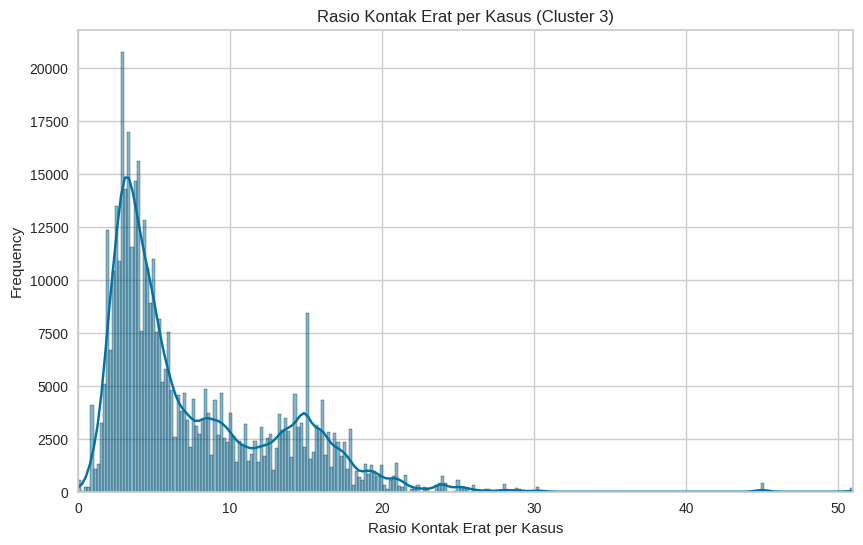

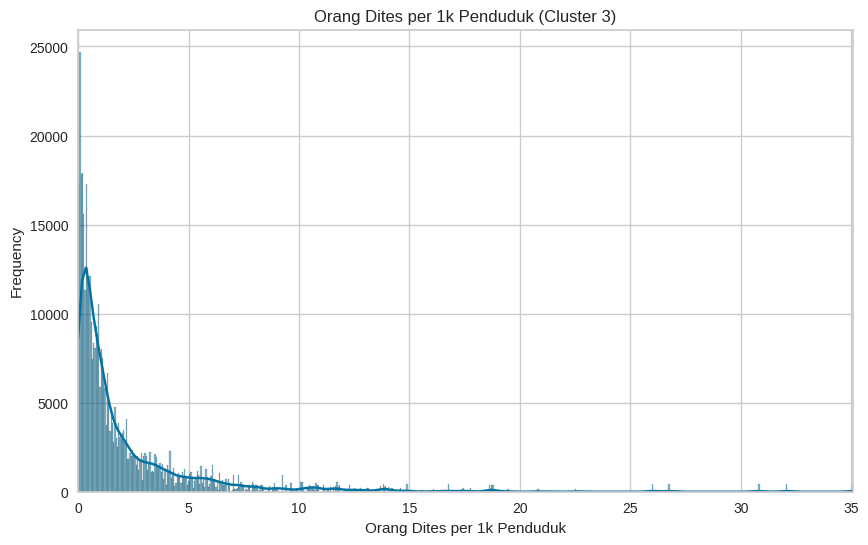

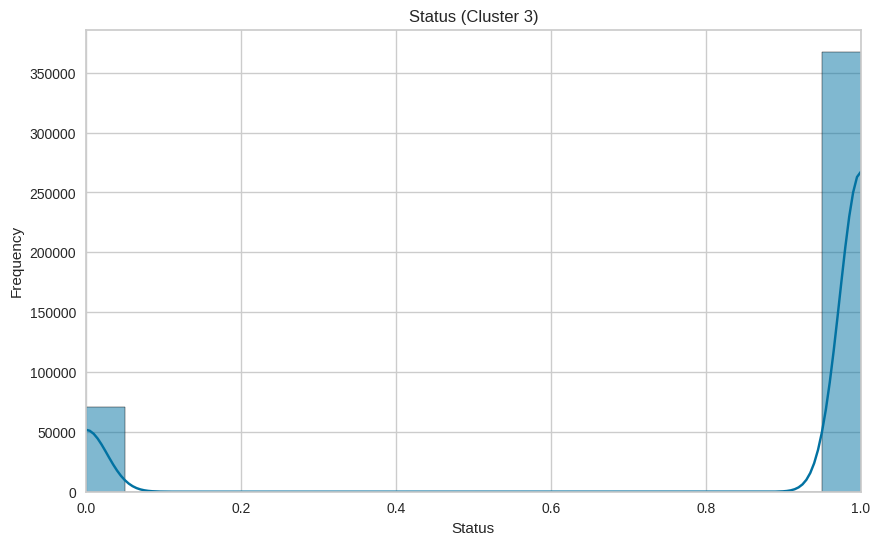

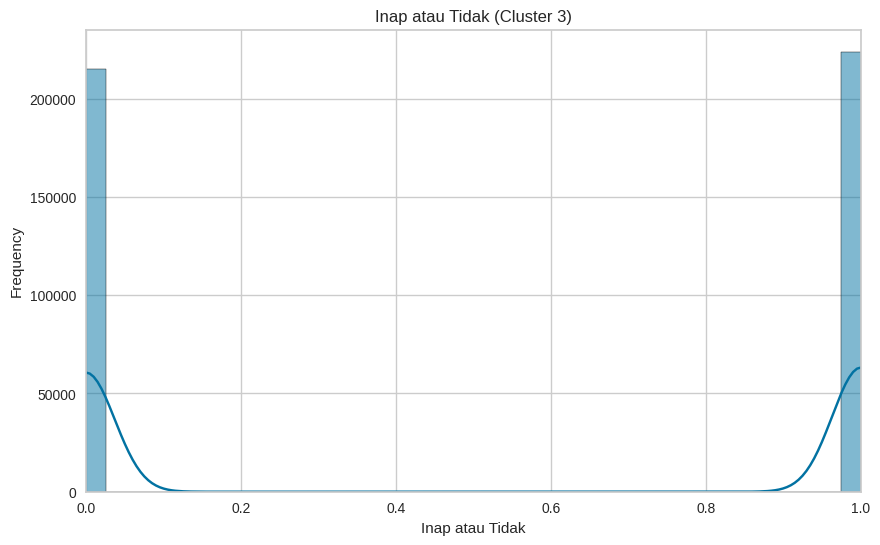

In [ ]:
# Daftar fitur yang akan digunakan
features = [
    'Rawat Inap Baru per 100k',
    'Proporsi Tes Positif',
    'Kasus Baru per 100k Penduduk',
    'Kematian per 100k Penduduk',
    'Rasio Keterisian Tempat Tidur',
    'Rasio Kontak Erat per Kasus',
    'Orang Dites per 1k Penduduk',
    'Status',
    'Inap atau Tidak'
]

# Menentukan cluster yang diinginkan
selected_cluster = 3

# Memfilter data untuk cluster yang dipilih
cluster_data = df_analysis[df_analysis['Clusters'] == selected_cluster]

# Membuat plot histogram untuk setiap fitur dalam cluster yang dipilih
for feature in features:
    plt.figure(figsize=(10, 6))
    sns.histplot(cluster_data[feature], kde=True)
    plt.title(f'{feature} (Cluster {selected_cluster})')
    plt.xlabel(feature)
    plt.ylabel('Frequency')

    # Mengatur nilai asli pada sumbu x
    plt.xlim(cluster_data[feature].min(), cluster_data[feature].max())

    plt.show()

In [ ]:
df_analysis.head()

tahun  minggu nama_provinsi  Rawat Inap Baru per 100k  \
0   2021      42          ACEH                      0.24   
1   2021      42          ACEH                      0.24   
2   2021      42          ACEH                      0.24   
3   2021      42          ACEH                      0.24   
4   2021      42          ACEH                      0.24   

   Proporsi Tes Positif  Kasus Baru per 100k Penduduk  \
0                   1.3                          1.72   
1                   1.3                          1.72   
2                   1.3                          1.72   
3                   1.3                          1.72   
4                   1.3                          1.72   

   Kematian per 100k Penduduk  Rasio Keterisian Tempat Tidur  \
0                        0.22                           9.68   
1                        0.22                           9.68   
2                        0.22                           9.68   
3                        0.22                           9.68   
4                        0.22                           9.68   

   Rasio Kontak Erat per Kasus  Orang Dites per 1k Penduduk  bulan  Status  \
0                         9.21                         1.33     10       1   
1                         9.21                         0.11     10       1   
2                         9.21                         0.02     10       1   
3                        12.11                         1.33     10       1   
4                        12.11                         0.11     10       1   

   Inap atau Tidak  Clusters  
0                1         1  
1                1         1  
2                1         1  
3                1         1  
4                1         1

In [ ]:
df_analysis.to_csv('df_analysis.csv', index=False)

In [ ]:

# Menghitung Davies-Bouldin Index
db_index = davies_bouldin_score(PCA_ds, cluster_labels)
print(f'Davies-Bouldin Index: {db_index}')

Davies-Bouldin Index: 0.9192738910580753


In [ ]:

# Menghitung Calinski-Harabasz Index
ch_index = calinski_harabasz_score(PCA_ds, cluster_labels)
print(f'Calinski-Harabasz Index: {ch_index}')

Calinski-Harabasz Index: 1413020.0185427167


In [ ]:
# Menghitung jumlah cluster untuk setiap provinsi, kecuali "INDONESIA"
cluster_counts = df_analysis[df_analysis['nama_provinsi'] != 'INDONESIA'].groupby('nama_provinsi')['Clusters'].value_counts().unstack(fill_value=0)

# Menentukan kluster yang paling banyak muncul untuk setiap provinsi, kecuali "INDONESIA"
cluster_counts['Terindikasi'] = cluster_counts.iloc[:, :-1].idxmax(axis=1).apply(lambda x: f'Cluster {x}' if pd.notna(x) else None)

# Menyimpan DataFrame ke dalam file Excel
excel_filename = 'cluster_counts_with_indicator.xlsx'
cluster_counts.to_excel(excel_filename)


In [ ]:
# Menghitung jumlah cluster untuk setiap provinsi, kecuali "INDONESIA"
cluster_counts = df_analysis[df_analysis['nama_provinsi'] != 'INDONESIA'].groupby('nama_provinsi')['Clusters'].value_counts().unstack(fill_value=0)

# Menentukan kluster yang paling banyak muncul untuk setiap provinsi, kecuali "INDONESIA"
cluster_counts['Terindikasi'] = cluster_counts.iloc[:, :-1].idxmax(axis=1).apply(lambda x: f'Cluster {x}' if pd.notna(x) else None)

# Ubah nama provinsi untuk hanya kata pertama huruf besar
cluster_counts.index = cluster_counts.index.str.title()

# Simpan DataFrame ke dalam file CSV
csv_filename = 'cluster_counts_with_indicator.csv'
cluster_counts.to_csv(csv_filename)

In [ ]:
# Menghitung jumlah cluster untuk setiap provinsi
cluster_counts = df_analysis.groupby('nama_provinsi')['Clusters'].value_counts().unstack(fill_value=0)

# Simpan DataFrame ke dalam file Excel
excel_filename = 'cluster_counts.xlsx'
cluster_counts.to_excel(excel_filename)

In [ ]:
# Menghitung jumlah cluster untuk setiap provinsi
cluster_counts = df_analysis.groupby('nama_provinsi')['Clusters'].value_counts().unstack(fill_value=0)
print(cluster_counts)
cluster_counts.to_csv('cluster_counts.csv')

Clusters                       0      1      2      3
nama_provinsi                                        
ACEH                       11656  21165   6459  11472
BALI                       10340  24822  26798  19556
BANTEN                      9740  22014  26727  20362
BENGKULU                   14528  12149   3101   4160
DI YOGYAKARTA              15889  22060  22027  18867
DKI JAKARTA                 1101  21177  36062  29332
GORONTALO                   9044  11148    993   4359
INDONESIA                   1278  26721  35945  23728
JAMBI                      11890  22980  13630  10774
JAWA BARAT                  4104  23557  31810  22774
JAWA TENGAH                 3271  26001  29402  23409
JAWA TIMUR                  2295  27624  34627  22073
KALIMANTAN BARAT           12029  17573  10007   9556
KALIMANTAN SELATAN         14758  19289  15832  17673
KALIMANTAN TENGAH          17361  20257  12274  11860
KALIMANTAN TIMUR           12129  25351  20126  16053
KALIMANTAN UTARA           1

In [ ]:
col = list(df_analysis.columns)
col.remove('nama_provinsi')
categorical_features = ['nama_provinsi']
numerical_features = [*col]
print('Categorical Features :',*categorical_features)
print('Numerical Features :',*numerical_features)

Categorical Features : nama_provinsi
Numerical Features : tahun minggu Rawat Inap Baru per 100k Proporsi Tes Positif Kasus Baru per 100k Penduduk Kematian per 100k Penduduk Rasio Keterisian Tempat Tidur Rasio Kontak Erat per Kasus Orang Dites per 1k Penduduk bulan Status Inap atau Tidak Clusters


#Kesimpulan

Dari grafik tiap Cluster menunjukkan bahwa:

- **Cluster 0**: Dengan rata-rata rawat inap baru, kasus baru, kematian, kontak erat per kasus, dan tes per 1k rendah, tetapi proporsi tes positif dan keterisian tempat tidur tinggi, cluster ini menunjukkan penyebaran rendah namun perlu perhatian pada kapasitas perawatan.
- **Cluster 1**: Dengan rata-rata rawat inap baru, kasus baru, kematian, proporsi tes positif, dan keterisian tempat tidur rendah, namun kontak erat per kasus dan tes per 1k tinggi, cluster ini menunjukkan pencegahan efektif tetapi perlu pengawasan pengujian.
- **Cluster 2**: Dengan rata-rata rawat inap baru dan kasus baru per 100k rendah, tetapi kematian, proporsi tes positif, keterisian tempat tidur, kontak erat per kasus, dan tes per 1k tinggi, cluster ini menunjukkan kasus terkendali dengan pengujian intensif.
- **Cluster 3**: Rata-rata semua kolom memiliki angka yang
tinggi menunjukkan situasi serius yang membutuhkan
respons dan perhatian besar.